<a href="https://colab.research.google.com/github/ivy3150/Investment-Analysis-and-Portfolio-Management/blob/main/Project_2_Investment_Analysis_Portfolio_Management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project 2: Investment Analysis and Portfolio Management**

**Objective:** <br>
Create a portfolio that balances the conflicting variables of risk and profit appropriately given differing criteria. 

#Data Prep and EDA

In [ ]:
# mount your drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# some useful modules
import pandas as pd
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read and clean the data

In [ ]:
# Read dataset
df = pd.read_csv("/content/drive/Shareddrives/OPIM5641_Business Decision Modeling/Project 2/all_transactions.csv")

# clean data with trim
senator_df = df[df["senator"] == 'Sheldon Whitehouse']
# dropped column 8-10 (Senator name, link, disclosure date)
trim = senator_df.iloc[:,[0,1,2,3,4,5,6,7]]
# clean data to only include dates ranging Jan. 1, 2015 through March 1, 2020
trim['transaction_date'] = pd.to_datetime(trim['transaction_date']) 
mask = (trim['transaction_date'] >= '2015-01-01') & (trim['transaction_date'] <= '2020-03-01')
trim.loc[mask]
senator_stock = trim.loc[mask]
senator_stock.info()
senator_stock.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 511 entries, 834 to 7930
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   transaction_date   511 non-null    datetime64[ns]
 1   owner              511 non-null    object        
 2   ticker             511 non-null    object        
 3   asset_description  511 non-null    object        
 4   asset_type         511 non-null    object        
 5   type               511 non-null    object        
 6   amount             511 non-null    object        
 7   comment            511 non-null    object        
dtypes: datetime64[ns](1), object(7)
memory usage: 35.9+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,transaction_date,owner,ticker,asset_description,asset_type,type,amount,comment
834,2019-07-05,Self,IBM,International Business Machines Corporation,Stock,Sale (Full),"$1,001 - $15,000",--
835,2019-07-05,Spouse,IBM,International Business Machines Corporation,Stock,Sale (Full),"$1,001 - $15,000",--
1752,2020-02-13,Self,WM,"Waste Management, Inc.",Stock,Sale (Full),"$15,001 - $50,000",--
1753,2020-02-13,Self,DLR,"Digital Realty Trust, Inc.",Stock,Purchase,"$15,001 - $50,000",--
2072,2019-12-19,Joint,IBM,International Business Machines Corporation,Stock,Sale (Full),"$1,001 - $15,000",--


In [ ]:
# viewing all the tickers in the Senator's portfolio 
senator_stock['ticker'].unique()

array(['IBM', 'WM', 'DLR', 'TSLA', 'CVS', 'T', 'NSRGY', 'KO', 'NVDA',
       'INTC', 'PGR', 'TEL', 'MCD', 'VZ', 'SIEGY', 'SQ', 'CGNX', 'BA',
       'BIIB', 'NFLX', 'FB', 'PEP', 'PG', 'HAS', 'GS', 'ETN', 'BUD',
       'REZI', 'AMZN', 'F', 'BMY', 'C', 'AAPL', 'UNP', 'COF', 'ILMN',
       'KHC', 'AET', 'LRCX', '--', 'ON', 'BABA', 'WMT', 'BRK-B', 'GILD',
       'MCHP', 'PYPL', 'DAL', 'BTO', 'CB', 'HD', 'ADI', 'MGA', 'V',
       'CMCSA', 'JPM', 'WPC', 'COST', 'GE', 'USB', 'NWL', 'DISH', 'JCI',
       'REGN', 'TMUS', 'MRK', 'QCOM', 'MCK', 'TJX', 'BHF', 'SYK', 'HPQ',
       'SBUX', 'CSCO', 'LW', 'FTV', 'BIVV', 'LB', 'MMC', 'WBA', 'TWTR',
       'VEVIX', 'MA', 'BAC', 'AKAM', 'AMGN', 'MMM', 'NKE', 'LLTC', 'CAG',
       'EL', 'ABT', 'PFE', 'MDT', 'PANW', 'UNH', 'IR', 'MO', 'PSA',
       'ORCL', 'DIS', 'GOOGL', 'UL', 'DEO', 'ASIX', 'HSBC', 'WFC', 'MAR',
       'WEC', 'SO', 'VOD', 'AXP', 'MET', 'CAT', 'RYAAY', 'UA', 'DHR',
       'ESRX', 'VFC', 'ACN', 'CERN', 'VMW', 'XER.BE', 'STT', 'HOT', 'CP',
 

In [ ]:
# remove the rows containing '--' in Column 'ticker' and check the unique values again
senator_stock = senator_stock[senator_stock['ticker']!='--']
senator_stock['ticker'].unique()

array(['IBM', 'WM', 'DLR', 'TSLA', 'CVS', 'T', 'NSRGY', 'KO', 'NVDA',
       'INTC', 'PGR', 'TEL', 'MCD', 'VZ', 'SIEGY', 'SQ', 'CGNX', 'BA',
       'BIIB', 'NFLX', 'FB', 'PEP', 'PG', 'HAS', 'GS', 'ETN', 'BUD',
       'REZI', 'AMZN', 'F', 'BMY', 'C', 'AAPL', 'UNP', 'COF', 'ILMN',
       'KHC', 'AET', 'LRCX', 'ON', 'BABA', 'WMT', 'BRK-B', 'GILD', 'MCHP',
       'PYPL', 'DAL', 'BTO', 'CB', 'HD', 'ADI', 'MGA', 'V', 'CMCSA',
       'JPM', 'WPC', 'COST', 'GE', 'USB', 'NWL', 'DISH', 'JCI', 'REGN',
       'TMUS', 'MRK', 'QCOM', 'MCK', 'TJX', 'BHF', 'SYK', 'HPQ', 'SBUX',
       'CSCO', 'LW', 'FTV', 'BIVV', 'LB', 'MMC', 'WBA', 'TWTR', 'VEVIX',
       'MA', 'BAC', 'AKAM', 'AMGN', 'MMM', 'NKE', 'LLTC', 'CAG', 'EL',
       'ABT', 'PFE', 'MDT', 'PANW', 'UNH', 'IR', 'MO', 'PSA', 'ORCL',
       'DIS', 'GOOGL', 'UL', 'DEO', 'ASIX', 'HSBC', 'WFC', 'MAR', 'WEC',
       'SO', 'VOD', 'AXP', 'MET', 'CAT', 'RYAAY', 'UA', 'DHR', 'ESRX',
       'VFC', 'ACN', 'CERN', 'VMW', 'XER.BE', 'STT', 'HOT', 'CP', 'IONS',

In [ ]:
# check the unique values in Column 'amount' 
senator_stock['amount'].unique()

array(['$1,001 - $15,000', '$15,001 - $50,000'], dtype=object)

In [ ]:
# make Column 'amount' equal to the upper limit and the data type becomes integer by using replace function
senator_stock['amount'].replace({"$1,001 - $15,000":15000,"$15,001 - $50,000":50000}, inplace=True) 
senator_stock['amount'].head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


834     15000
835     15000
1752    50000
1753    50000
2072    15000
Name: amount, dtype: int64

In [ ]:
# check the unique values and they all become integers
senator_stock['amount'].unique()

array([15000, 50000])

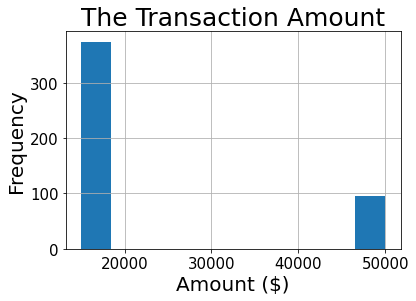

In [ ]:
# visualize the data
senator_stock['amount'].hist()
plt.title('The Transaction Amount',fontsize=25)
plt.xlabel('Amount ($)',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.show()

##Classify stocks into purchased and sold

In [ ]:
# check the unique values for type (exchange should be categorized as purchase or sold)
senator_stock['type'].unique()

array(['Sale (Full)', 'Purchase', 'Sale (Partial)', 'Exchange'],
      dtype=object)

In [ ]:
# create a dataframe that stocks were purchased
stock_buy = senator_stock[senator_stock["type"]== "Purchase"]
stock_buy.shape

(271, 8)

## Top 10 Stocks Purchased

In [ ]:
# top 10 stocks that were purchased 
topten_buy = stock_buy.groupby("ticker").sum()
topten_buy.sort_values(by=['amount'], axis=0, ascending=False, inplace=True)
topten_buy.head(n=10)

,amount
ticker,
GILD,200000
BIIB,170000
FB,165000
IBM,155000
NVDA,150000
AMGN,140000
WMT,140000
T,135000
LRCX,120000




Created a bar graph to show the top 10 stocks purchased in Senator Sheldon Whitehouse's portfolio. 

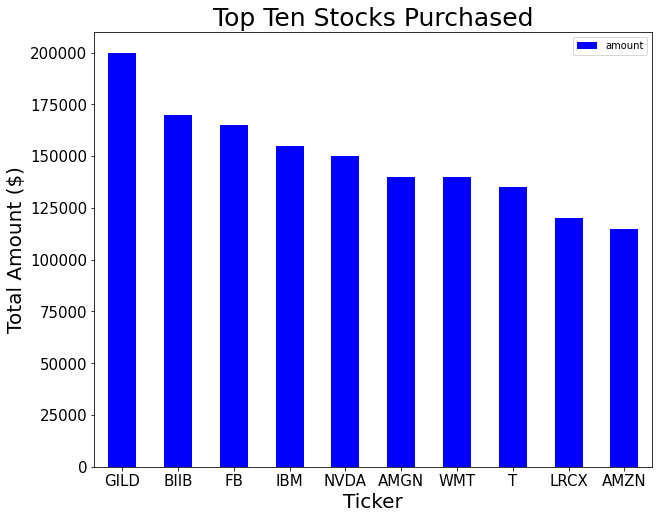

In [ ]:
# For the top 10 purchased
# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,8)
# create a bar chart to view the top ten stocks purchased
topten_buy.head(n=10).plot(kind='bar', color='blue')

# add titles, headers, and legend to histogram
plt.title('Top Ten Stocks Purchased', fontsize=25)
plt.xlabel('Ticker', fontsize=20)
plt.ylabel('Total Amount ($)', fontsize=20)
plt.tick_params(axis='x', labelsize=15, rotation=0)
plt.tick_params(axis='y', labelsize=15)
plt.show()

**Conclusion:** Stocks GILD, BIIB, and FB are the top 3 stocks purchased by Senator Whitehouse 2015 - March 2020. 

## Top 10 Stocks Sold

In [ ]:
# create a dataframe that stocks were sold
stock_sold = senator_stock[(senator_stock["type"]== "Sale (Full)") | (senator_stock["type"]== "Sale (Partial)")]
stock_sold.shape

(188, 8)

In [ ]:
# top 10 stocks that were sold
topten_sold = stock_sold.groupby("ticker").sum()
topten_sold.sort_values(by=['amount'], axis=0, ascending=False, inplace=True)
topten_sold.head(n=10)

,amount
ticker,
AAPL,260000
NSRGY,250000
FB,180000
GILD,155000
VFC,150000
CVS,130000
MCHP,115000
NFLX,115000
CP,100000




Created a bar graph to show the top 10 stocks sold in Senator Sheldon Whitehouse's portfolio. 

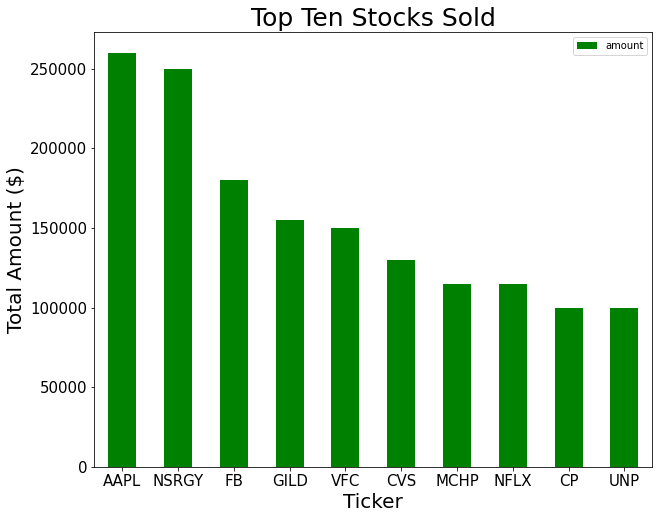

In [ ]:
# For the top 10 sold
plt.rcParams['figure.figsize'] = (10,8)
# create a bar chart to view the top ten stocks sold
topten_sold.head(n=10).plot(kind='bar', color='green')

# add titles, headers, and legend to histogram
plt.title('Top Ten Stocks Sold', fontsize=25)
plt.xlabel('Ticker', fontsize=20)
plt.ylabel('Total Amount ($)', fontsize=20)
plt.tick_params(axis='x', labelsize=15, rotation=0)
plt.tick_params(axis='y', labelsize=15)
plt.show()

**Conclusion:** The most stocks sold by Senator Whitehouse is AAPL, NSRGY, and FB during the time period 2015 - March 2020. FB was in third position for both top sold and purchased. 

# Import external dataset
This dataset is a list of S&P 500 component stocks. We want to merge our original dataset and this external dataset to see how many stocks the senator bought and sold are in S&P 500 list and also see which sector he bought and sold the most stocks from.

In [ ]:
# bring in external dataset 
first_attempt = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
print(type(first_attempt))
first_attempt
# After try and error, we got the correct position and get the dataset

<class 'list'>


[    Symbol            Security  ...      CIK      Founded
 0      MMM                  3M  ...    66740         1902
 1      AOS         A. O. Smith  ...    91142         1916
 2      ABT              Abbott  ...     1800         1888
 3     ABBV              AbbVie  ...  1551152  2013 (1888)
 4     ABMD             Abiomed  ...   815094         1981
 ..     ...                 ...  ...      ...          ...
 500    YUM         Yum! Brands  ...  1041061         1997
 501   ZBRA  Zebra Technologies  ...   877212         1969
 502    ZBH       Zimmer Biomet  ...  1136869         1927
 503   ZION       Zions Bancorp  ...   109380         1873
 504    ZTS              Zoetis  ...  1555280         1952
 
 [505 rows x 9 columns],
                   Date  ...                                             Reason
                   Date  ...                                             Reason
 0    February 15, 2022  ...  S&P 500 constituent Advanced Micro Devices acq...
 1     February 3, 2022  

In [ ]:
# find position to read table from wikipedia
print("First position",first_attempt[0])
#print("Third position",first_attempt[2])
SPX = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
SPX

First position     Symbol            Security  ...      CIK      Founded
0      MMM                  3M  ...    66740         1902
1      AOS         A. O. Smith  ...    91142         1916
2      ABT              Abbott  ...     1800         1888
3     ABBV              AbbVie  ...  1551152  2013 (1888)
4     ABMD             Abiomed  ...   815094         1981
..     ...                 ...  ...      ...          ...
500    YUM         Yum! Brands  ...  1041061         1997
501   ZBRA  Zebra Technologies  ...   877212         1969
502    ZBH       Zimmer Biomet  ...  1136869         1927
503   ZION       Zions Bancorp  ...   109380         1873
504    ZTS              Zoetis  ...  1555280         1952

[505 rows x 9 columns]


,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,AOS,A. O. Smith,reports,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
...,...,...,...,...,...,...,...,...,...
500,YUM,Yum! Brands,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
501,ZBRA,Zebra Technologies,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
502,ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


In [ ]:
# merge the  the original senator_stock list with external dataset
# Inner join so that some NULL values will be remove
mergedstock = senator_stock.merge(SPX, left_on='ticker', right_on='Symbol')
mergedstock.head(5)
mergedstock.shape  # (469, 17) Meaning these 469 stocks the senator invested were all S&P500 stocks

# Group by GICS Sector to find out what sector the senator invested the most
sector = mergedstock.groupby("GICS Sector").count()
print(sector)
print(mergedstock)

                        transaction_date  owner  ...  CIK  Founded
GICS Sector                                      ...              
Communication Services                63     63  ...   63       63
Consumer Discretionary                55     55  ...   55       55
Consumer Staples                      25     25  ...   25       25
Financials                            43     43  ...   43       43
Health Care                           78     78  ...   78       78
Industrials                           38     38  ...   38       38
Information Technology                71     71  ...   71       71
Materials                              1      1  ...    1        1
Real Estate                            4      4  ...    4        4
Utilities                              2      2  ...    2        2

[10 rows x 16 columns]
    transaction_date   owner ticker  ... Date first added      CIK      Founded
0         2019-07-05    Self    IBM  ...       1957-03-04    51143         1911
1         20

# Plots and tables
There are three major findings, and we visualize the data using different plots.

## Plot 1
After merging the two datasets on ticker symbols, we built a bar chart. The sectors of tickers represent x-axis and number of stocks represent y-axis. The number of stocks is to count how many stocks Senator Whitehouse bought and sold in S&P 500 list. We visualize those numbers in sectors, to infer which sector has the highest trading value in Senator's portfolio.

Note: S&P 500 sort uses current list and not list at the time of purchase. Individual purchases may not have been included in the SPX index at the time of purchase.

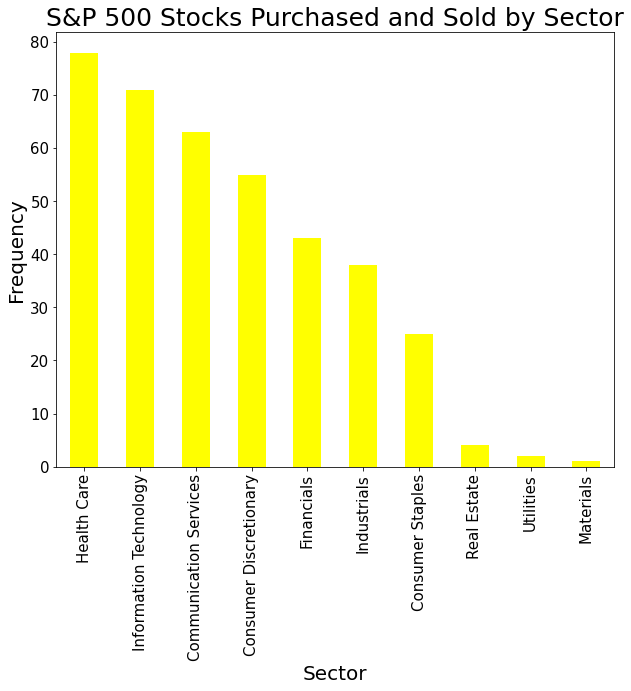

In [ ]:
plt.rcParams['figure.figsize'] = (10,8)
# create a bar chart to view the frequency of stocks that senators bought and sold in each sector
pd.Series(sector['ticker']).sort_values(axis=0, ascending=False, inplace=False).plot(kind='bar', color='yellow')
#sector['ticker'].plot(kind='bar', color='yellow')

# add titles, headers, and legend to histogram
plt.title('S&P 500 Stocks Purchased and Sold by Sector', fontsize=25)
plt.xlabel('Sector', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.tick_params(axis='x', labelsize=15, rotation=90)
plt.tick_params(axis='y', labelsize=15)
plt.show()

**Conclusion**: <br>
As the graph shown above, Health Care has the highest number and Information Technology has the second highest number. This means the senator attached importance to Healthcare and Information Technology. Information Technology in particular is an expected choice. Since the sector has seen the most growth and returns over the reviewed time frame, it is no surprise to see it featured in the Senator's portfolio.

Real Estate, Utilities, and Materials have the lowest transaction frequency, meaning the senator puts low importance in these sectors. Utilities ranking in the bottom does not come as a surprise, since the utilities sector is traditionally a low risk low return set of stocks. The low frequency in the materials sector is somewhat surprising considering the relatively high frequency in the industrials sector. The pricing and supply driven by the materials sector often dictates the returns of the industrials, making the two a natural pair, avoiding one may be disadvantageous in an environment where materials costs eat in to operating margins.


## Plot 2
Plots that display which months and years the senator purchased and sold the most amount of stock. 

In [ ]:
# Converting transaction_date from stock_buy to datetime
stock_buy['transaction_date']=pd.to_datetime(stock_buy['transaction_date'])

# Making new columns for day, week, month, and the name of day to be more clear about the date. 
stock_buy['Year']=stock_buy['transaction_date'].dt.year
stock_buy['Day']=stock_buy['transaction_date'].dt.day
stock_buy['Week']=stock_buy['transaction_date'].dt.week
stock_buy['Month']=stock_buy['transaction_date'].dt.month
stock_buy['dayname']=stock_buy['transaction_date'].dt.day_name()
stock_buy.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,transaction_date,owner,ticker,asset_description,asset_type,type,amount,comment,Year,Day,Week,Month,dayname
1753,2020-02-13,Self,DLR,"Digital Realty Trust, Inc.",Stock,Purchase,50000,--,2020,13,7,2,Thursday
2306,2019-08-27,Self,CVS,CVS Health Corporation,Stock,Purchase,15000,--,2019,27,35,8,Tuesday
2307,2019-08-27,Self,T,AT&amp;T Inc.,Stock,Purchase,15000,--,2019,27,35,8,Tuesday
2478,2019-06-05,Self,KO,The Coca-Cola Company,Stock,Purchase,15000,--,2019,5,23,6,Wednesday
2560,2019-05-17,Joint,NVDA,NVIDIA Corporation,Stock,Purchase,15000,--,2019,17,20,5,Friday


In [ ]:
# Converting transaction_date from stock_sold to datetime
stock_sold['transaction_date']=pd.to_datetime(stock_sold['transaction_date'])

# Making new columns for day, week, month, and the name of day to be more clear about the date. 
stock_sold['Year']=stock_sold['transaction_date'].dt.year
stock_sold['Day']=stock_sold['transaction_date'].dt.day
stock_sold['Week']=stock_sold['transaction_date'].dt.week
stock_sold['Month']=stock_sold['transaction_date'].dt.month
stock_sold['dayname']=stock_sold['transaction_date'].dt.day_name()
stock_sold.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,transaction_date,owner,ticker,asset_description,asset_type,type,amount,comment,Year,Day,Week,Month,dayname
834,2019-07-05,Self,IBM,International Business Machines Corporation,Stock,Sale (Full),15000,--,2019,5,27,7,Friday
835,2019-07-05,Spouse,IBM,International Business Machines Corporation,Stock,Sale (Full),15000,--,2019,5,27,7,Friday
1752,2020-02-13,Self,WM,"Waste Management, Inc.",Stock,Sale (Full),50000,--,2020,13,7,2,Thursday
2072,2019-12-19,Joint,IBM,International Business Machines Corporation,Stock,Sale (Full),15000,--,2019,19,51,12,Thursday
2305,2019-08-27,Joint,TSLA,"Tesla, Inc.",Stock,Sale (Full),15000,--,2019,27,35,8,Tuesday


In [ ]:
# group by year and month, then show the sum of amount
buy_most = stock_buy.groupby(['Year','Month'])['amount'].sum().sort_values(ascending= False).head(10)
buy_most

Year  Month
2017  5        305000
2016  1        260000
      5        245000
2019  4        240000
2016  11       225000
2017  1        210000
2018  5        200000
2015  5        195000
2016  4        185000
2017  2        185000
Name: amount, dtype: int64

In [ ]:
# group by year and month, then show the sum of amount
sold_most = stock_sold.groupby(['Year','Month'])['amount'].sum().sort_values(ascending= False).head(10)
sold_most

Year  Month
2018  12       400000
2016  9        355000
2017  1        290000
      9        225000
      5        220000
2015  1        210000
2016  4        195000
      1        180000
2015  4        165000
2019  2        165000
Name: amount, dtype: int64

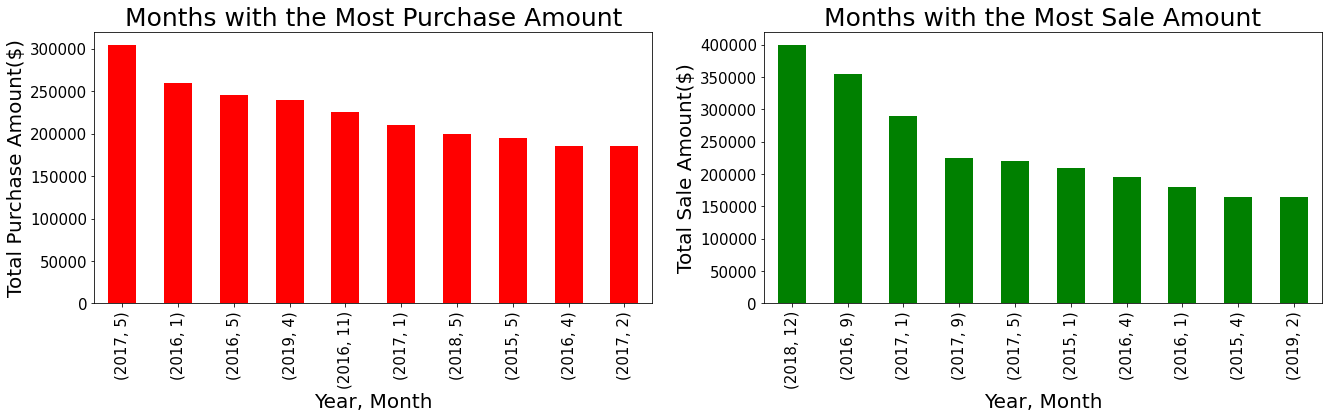

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(22,5))
plt.rcParams['figure.figsize'] = (22,5)

# create a bar chart to view the top ten stocks sold
buy_most.plot(kind='bar', color='red', ax=ax1)
sold_most.plot(kind='bar', color='green', ax=ax2)
# add titles, headers, and legend to histogram
ax1.set_title('Months with the Most Purchase Amount',fontsize=25)
ax2.set_title('Months with the Most Sale Amount',fontsize=25)
ax1.set_xlabel('Year, Month',fontsize=20)
ax1.set_ylabel('Total Purchase Amount($)',fontsize=20)
ax2.set_xlabel('Year, Month',fontsize=20)
ax2.set_ylabel('Total Sale Amount($)',fontsize=20)
ax1.tick_params(axis='x', labelsize=15, rotation=90)
ax1.tick_params(axis='y', labelsize=15)
ax2.tick_params(axis='x', labelsize=15, rotation=90)
ax2.tick_params(axis='y', labelsize=15)
plt.show()

**Conclusion**: <br>
As both plots shown above, Senator Whitehouse seems to have done a majority of his trading in the years 2016 and 2017. While he sold a large amount of stock in December 2018 he did not purchase a large amount in 2019 or 2020 to replace those sales. 

Notice, many of the leading buying and selling dates are at least 1 year apart. It is likely that the Senator held investments for greater than 1 year before selling in order to avoid any short term capital gains taxes and instead use the lowered rates of the long term capital gains tax.

### All Stocks Return and Std Deviation
All stocks in Senator Whitehouse's falls into a sector on the S&P 500, we eliminated the stocks that provided null values and did not show financial data. Then we pull data from Yahoo Finance by sector. The highest returning stocks in each of those sectors are also displayed.

####Create dataframe for each sector to classify tickers
Use the unique tickers in each sector to classify our tickers into different sectors.

In [ ]:
#1.Communication Services 
CS = mergedstock[mergedstock['GICS Sector']=='Communication Services']
CS['ticker'].unique()

array(['T', 'VZ', 'NFLX', 'FB', 'CMCSA', 'DISH', 'TMUS', 'TWTR', 'DIS',
       'GOOGL'], dtype=object)

In [ ]:
#2.Consumer Discretionary 
CD = mergedstock[mergedstock['GICS Sector']=='Consumer Discretionary']
CD['ticker'].unique()

array(['TSLA', 'MCD', 'HAS', 'AMZN', 'F', 'HD', 'NWL', 'TJX', 'SBUX',
       'NKE', 'MAR', 'UA', 'VFC'], dtype=object)

In [ ]:
#3.Consumer Staples
CStaples = mergedstock[mergedstock['GICS Sector']=='Consumer Staples']
CStaples['ticker'].unique()

array(['KO', 'PEP', 'PG', 'KHC', 'WMT', 'COST', 'LW', 'WBA', 'CAG', 'EL',
       'MO'], dtype=object)

In [ ]:
#4.Financials 
Financials = mergedstock[mergedstock['GICS Sector']=='Financials']
Financials['ticker'].unique()

array(['PGR', 'GS', 'C', 'COF', 'CB', 'JPM', 'USB', 'MMC', 'BAC', 'WFC',
       'AXP', 'MET', 'STT', 'PRU', 'AIG'], dtype=object)

In [ ]:
#5.Health Care 
HC = mergedstock[mergedstock['GICS Sector']=='Health Care']
HC['ticker'].unique()

array(['CVS', 'BIIB', 'BMY', 'ILMN', 'GILD', 'REGN', 'MRK', 'MCK', 'SYK',
       'AMGN', 'ABT', 'PFE', 'MDT', 'UNH', 'DHR', 'CERN', 'ABBV', 'A'],
      dtype=object)

In [ ]:
#6.Industrials 
Industrials = mergedstock[mergedstock['GICS Sector']=='Industrials']
Industrials['ticker'].unique()

array(['WM', 'BA', 'ETN', 'UNP', 'DAL', 'GE', 'JCI', 'FTV', 'MMM', 'IR',
       'CAT', 'LMT', 'CSX', 'PCAR'], dtype=object)

In [ ]:
#7.Information Technology 
IT = mergedstock[mergedstock['GICS Sector']=='Information Technology']
IT['ticker'].unique()

array(['IBM', 'NVDA', 'INTC', 'TEL', 'AAPL', 'LRCX', 'MCHP', 'PYPL',
       'ADI', 'V', 'QCOM', 'HPQ', 'CSCO', 'MA', 'AKAM', 'ORCL', 'ACN',
       'MSFT'], dtype=object)

In [ ]:
#8.Materials
Materials = mergedstock[mergedstock['GICS Sector']=='Materials']
Materials['ticker'].unique()

array(['DD'], dtype=object)

In [ ]:
#9.Real Estate                  
RE = mergedstock[mergedstock['GICS Sector']=='Real Estate']
RE['ticker'].unique()

array(['DLR', 'PSA'], dtype=object)

In [ ]:
#10.Utilities 
#no ticker in this sector
Utilities  = mergedstock[mergedstock['GICS Sector']=='Utilities']
Utilities['ticker'].unique()

array(['WEC', 'SO'], dtype=object)

#### Start to pull data from yahoo financial for each sector

In [ ]:
# Start to pull data from yahoo financials
!pip install yahoo_fin
!pip install requests_html
import yahoo_fin.stock_info as si
                                    
#Communication Services
ticker_list11 = ['T', 'VZ', 'NFLX', 'FB', 'CMCSA', 'DISH', 'TMUS', 'TWTR', 'DIS','GOOGL'] 
#Consumer Discretionary
ticker_list22 = ['TSLA', 'MCD', 'HAS', 'AMZN', 'F', 'HD', 'NWL', 'TJX', 'SBUX','NKE', 'MAR', 'UA', 'VFC'] 
#Consumer Staples 
ticker_list33 = ['KO', 'PEP', 'PG', 'KHC', 'WMT', 'COST', 'LW', 'WBA', 'CAG', 'EL','MO'] 
#Financials
ticker_list44 = ['PGR', 'GS', 'C', 'COF', 'CB', 'JPM', 'USB', 'MMC', 'BAC', 'WFC','AXP', 'MET', 'STT', 'PRU', 'AIG']  
#Health Care 
ticker_list55 = ['CVS', 'BIIB', 'BMY', 'ILMN', 'GILD', 'REGN', 'MRK', 'MCK', 'SYK','AMGN', 'ABT', 'PFE', 'MDT', 'UNH', 'DHR', 'CERN', 'ABBV', 'A']
#Industrials 
ticker_list66 = ['WM', 'BA', 'ETN', 'UNP', 'DAL', 'GE', 'JCI', 'FTV', 'MMM', 'IR','CAT', 'LMT', 'CSX', 'PCAR']
#Information Technology 
ticker_list77 = ['IBM', 'NVDA', 'INTC', 'TEL', 'AAPL', 'LRCX', 'MCHP', 'PYPL','ADI', 'V', 'QCOM', 'HPQ', 'CSCO', 'MA', 'AKAM', 'ORCL', 'ACN','MSFT']
# combine Materials, Real Estate, and Utilities
ticker_list88 = ['DD','DLR', 'PSA','WEC', 'SO'] 

 
# pull historical price data for each stocks to match with our news score later
dow_prices11 = {ticker : si.get_data(ticker,start_date = '01/01/2015',end_date='03/01/2020',interval='1d') for ticker in ticker_list11}
dow_prices22 = {ticker : si.get_data(ticker,start_date = '01/01/2015',end_date='03/01/2020',interval='1d') for ticker in ticker_list22}
dow_prices33 = {ticker : si.get_data(ticker,start_date = '01/01/2015',end_date='03/01/2020',interval='1d') for ticker in ticker_list33}
dow_prices44 = {ticker : si.get_data(ticker,start_date = '01/01/2015',end_date='03/01/2020',interval='1d') for ticker in ticker_list44}
dow_prices55 = {ticker : si.get_data(ticker,start_date = '01/01/2015',end_date='03/01/2020',interval='1d') for ticker in ticker_list55}
dow_prices66 = {ticker : si.get_data(ticker,start_date = '01/01/2015',end_date='03/01/2020',interval='1d') for ticker in ticker_list66}
dow_prices77 = {ticker : si.get_data(ticker,start_date = '01/01/2015',end_date='03/01/2020',interval='1d') for ticker in ticker_list77}
dow_prices88 = {ticker : si.get_data(ticker,start_date = '01/01/2015',end_date='03/01/2020',interval='1d') for ticker in ticker_list88}

     |████████████████████████████████| 81 kB 4.3 MB/s 
     |████████████████████████████████| 83 kB 1.8 MB/s 
     |████████████████████████████████| 127 kB 51.5 MB/s 
     |████████████████████████████████| 111 kB 49.2 MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=e3dfabcb13eeb686a2de127913ef6589c8022a1fdb3520b2425e9cfb0effbff7
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=6d0eba535acd5dbbe57900d503a58882fbfa94ebe014630223206e3402382f95
  Stored in directory: /root/.cache/pip/wheels/9c/aa/cc/f2228050ccb40f22144b073f15a2c84f11204f29fc0dce028e
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6066 sha256=04941d177c2667829f4afe0d2971b2ba6a902f05adf1371e47da73c9a1fee9d9
  Stored in directory: /root/.cache/pip/wheels/73/ad/a4/0dff4a6ef231fc0dfa12ffbac2a36ce

##### A. Communication Services 

In [ ]:
# let's extract just the data we need (adjclose)
# get the adjclose price for the T (one sample)
prep_data11 = pd.DataFrame(dow_prices11['T']['adjclose']).rename(columns = {"adjclose":"T"})

# combine all the tickers (all the rest of the samples)
for i in ticker_list11[1:]:
  prep_data11[i] = pd.DataFrame(dow_prices11[i]['adjclose'])
prep_data11

,T,VZ,NFLX,FB,CMCSA,DISH,TMUS,TWTR,DIS,GOOGL
2015-01-02,22.014774,33.892357,49.848572,78.449997,25.014933,72.269997,27.299999,36.560001,87.376259,529.549988
2015-01-05,21.806782,33.610889,47.311428,77.190002,24.504778,70.440002,26.930000,36.380001,86.099403,519.460022
2015-01-06,21.839279,33.950100,46.501431,76.150002,24.185110,68.669998,26.870001,38.759998,85.642700,506.640015
2015-01-07,21.865648,33.731010,46.742859,76.150002,24.163216,68.459999,28.250000,37.279999,86.518814,505.149994
2015-01-08,22.083191,34.453979,47.779999,78.180000,24.688698,70.220001,29.020000,39.090000,87.413528,506.910004
...,...,...,...,...,...,...,...,...,...,...
2020-02-24,32.919029,53.064705,368.700012,200.720001,42.841087,38.360001,96.370003,35.889999,133.009995,1419.859985
2020-02-25,32.313419,52.268593,360.089996,196.770004,41.467484,37.619999,94.580002,35.209999,128.190002,1386.319946
2020-02-26,32.097130,52.286896,379.239990,197.199997,40.554958,36.320000,93.650002,34.630001,123.360001,1390.469971
2020-02-27,30.911871,50.383553,371.709991,189.750000,39.431095,33.480000,91.239998,33.009998,118.040001,1314.949951


In [ ]:
# create return features for each ticker, 
# we will just use a pct_change as the return
return_data11 = pd.DataFrame()
for i in ticker_list11:
  return_data11[i] = prep_data11[i].pct_change()
# drop the na records
return_data11.dropna(inplace=True)
return_data11

,T,VZ,NFLX,FB,CMCSA,DISH,TMUS,TWTR,DIS,GOOGL
2015-01-05,-0.009448,-0.008305,-0.050897,-0.016061,-0.020394,-0.025322,-0.013553,-0.004923,-0.014613,-0.019054
2015-01-06,0.001490,0.010092,-0.017121,-0.013473,-0.013045,-0.025128,-0.002228,0.065420,-0.005304,-0.024679
2015-01-07,0.001207,-0.006453,0.005192,0.000000,-0.000905,-0.003058,0.051358,-0.038184,0.010230,-0.002941
2015-01-08,0.009949,0.021433,0.022188,0.026658,0.021747,0.025708,0.027257,0.048552,0.010341,0.003484
2015-01-09,-0.002985,-0.008902,-0.015458,-0.005628,-0.001596,0.022358,0.007926,0.027628,0.004905,-0.012211
...,...,...,...,...,...,...,...,...,...,...
2020-02-24,-0.012970,-0.003608,-0.029916,-0.045009,-0.026626,-0.058188,-0.022319,-0.063169,-0.042887,-0.042873
2020-02-25,-0.018397,-0.015003,-0.023352,-0.019679,-0.032063,-0.019291,-0.018574,-0.018947,-0.036238,-0.023622
2020-02-26,-0.006693,0.000350,0.053181,0.002185,-0.022006,-0.034556,-0.009833,-0.016473,-0.037678,0.002994
2020-02-27,-0.036927,-0.036402,-0.019855,-0.037779,-0.027712,-0.078194,-0.025734,-0.046780,-0.043126,-0.054313


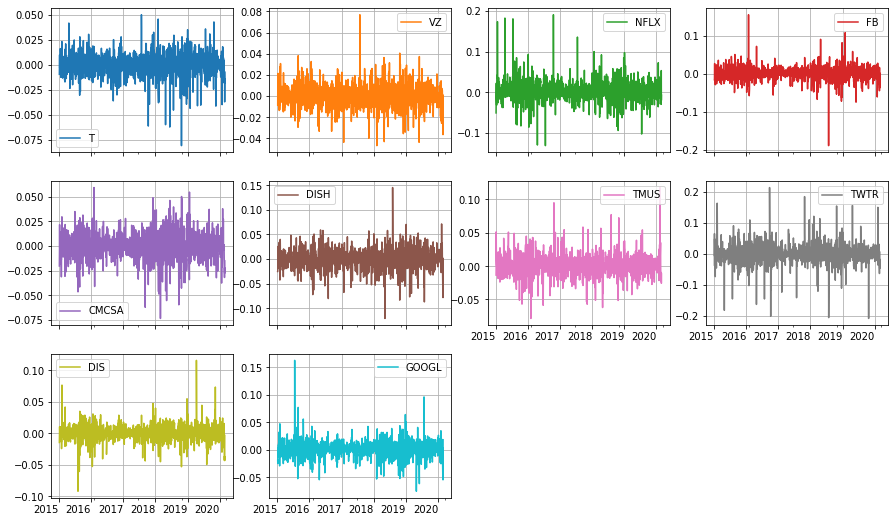

In [ ]:
# Visualize the Time Series
return_data11.plot(subplots=True,
        grid=True, 
        layout=(3,4),
         figsize=(15,10),
         rot=0)
plt.show()

In [ ]:
# Total return for 5 years
# NFLX ,TMUS, and FB are the highest
return_data11.sum()

T        0.409523
VZ       0.455084
NFLX     2.440274
FB       1.105457
CMCSA    0.557253
DISH    -0.503473
TMUS     1.357806
TWTR     0.577385
DIS      0.402306
GOOGL    1.073947
dtype: float64

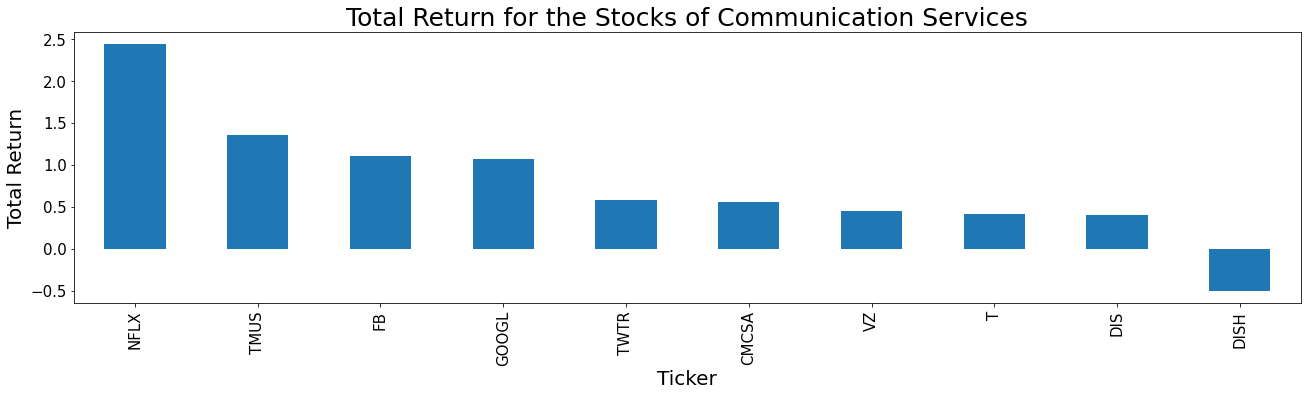

In [ ]:
# The ranking of the total return
return_data11.sum().sort_values(ascending=False, inplace=False).plot(kind='bar')
plt.title('Total Return for the Stocks of Communication Services',fontsize=25)
plt.xlabel('Ticker',fontsize=20)
plt.ylabel('Total Return',fontsize=20)
plt.tick_params(axis='x', labelsize=15, rotation=90)
plt.tick_params(axis='y', labelsize=15)

In [ ]:
# Get average return and std so that we can know what stocks have a high return (the higher the better), 
# and relatively low standard deviation (the lower the better)
# and that would be our target stock

# For Communication
Avg_Return_cs = pd.DataFrame(np.mean(return_data11) ,columns=["Avg_Return"])
print(Avg_Return_cs)
Std_Dev_Return_cs = pd.DataFrame(np.std(return_data11) ,columns=["Std_Dev_Return"])
print(Std_Dev_Return_cs)

       Avg_Return
T        0.000316
VZ       0.000351
NFLX     0.001881
FB       0.000852
CMCSA    0.000430
DISH    -0.000388
TMUS     0.001047
TWTR     0.000445
DIS      0.000310
GOOGL    0.000828
       Std_Dev_Return
T            0.011376
VZ           0.010758
NFLX         0.026129
FB           0.017825
CMCSA        0.013433
DISH         0.020160
TMUS         0.015872
TWTR         0.032022
DIS          0.012721
GOOGL        0.015052


##### B. Consumer Discretionary 

In [ ]:
# let's extract just the data we need (adjclose)
# get the adjclose price for the TSLA (one sample)
prep_data22 = pd.DataFrame(dow_prices22['TSLA']['adjclose']).rename(columns = {"adjclose":"TSLA"})

# combine all the tickers (all the rest of the samples)
for i in ticker_list22[1:]:
  prep_data22[i] = pd.DataFrame(dow_prices22[i]['adjclose'])
prep_data22

,TSLA,MCD,HAS,AMZN,F,HD,NWL,TJX,SBUX,NKE,MAR,UA,VFC
2015-01-02,43.862000,77.444824,45.216579,308.519989,11.126412,88.404045,29.713202,30.862522,35.775993,44.105827,72.376427,NaN,58.551617
2015-01-05,42.018002,76.589508,45.348194,302.190002,10.691790,86.549294,29.367874,30.517385,35.090694,43.395710,70.393654,NaN,58.059448
2015-01-06,42.256001,76.730652,44.755936,295.290009,10.590375,86.284340,28.857752,30.367525,34.805153,43.140442,69.509308,NaN,57.718124
2015-01-07,42.189999,78.067642,44.969807,298.420013,10.894611,89.241684,29.030403,30.989674,35.661785,44.031563,71.101128,NaN,58.456383
2015-01-08,42.124001,78.358284,45.241257,300.459991,11.169875,91.216095,29.705353,31.153156,36.237263,45.047997,73.456284,NaN,59.774094
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-24,166.757996,203.659576,81.818932,2009.290039,7.493547,229.383102,16.633522,60.620323,81.432159,94.295570,134.291534,14.14,77.676216
2020-02-25,159.981995,202.305161,77.985878,1972.739990,7.156981,227.162994,15.530094,58.627460,79.187286,91.336235,123.584465,13.46,73.319199
2020-02-26,155.759995,200.397522,77.506744,1979.589966,7.137183,225.153366,15.128848,62.819340,77.722816,90.451378,119.709999,13.04,72.512337
2020-02-27,135.800003,191.717743,74.697708,1884.300049,6.899607,215.057449,14.093129,59.020134,75.429756,87.059456,119.639999,12.55,69.484276


In [ ]:
# create return features for each ticker, 
# we will just use a pct_change as the return
return_data22 = pd.DataFrame()
for i in ticker_list22:
  return_data22[i] = prep_data22[i].pct_change()
# drop the na records
return_data22.dropna(inplace=True)
return_data22

,TSLA,MCD,HAS,AMZN,F,HD,NWL,TJX,SBUX,NKE,MAR,UA,VFC
2016-03-24,0.023228,-0.007247,-0.009863,0.023384,-0.015083,0.001843,-0.002553,-0.007720,-0.007989,-0.012652,-0.013793,-0.015181,-0.005433
2016-03-28,0.011021,-0.000973,0.010608,-0.005284,0.002297,0.004753,0.019311,0.008299,0.010281,-0.005028,0.039335,0.000000,0.004838
2016-03-29,-0.000565,0.006495,0.001409,0.024126,0.008404,0.010604,0.026022,0.011059,0.010007,0.002445,-0.008971,0.000000,0.008543
2016-03-30,-0.014079,0.015004,0.004091,0.008133,0.011363,0.007172,-0.012904,0.000763,0.007725,0.008945,0.012023,0.027649,0.004775
2016-03-31,0.012693,-0.001192,0.019733,-0.008435,0.011236,0.000075,-0.001803,-0.004194,-0.005166,-0.009188,-0.005171,-0.006667,-0.007357
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-24,-0.074595,-0.010886,-0.032011,-0.041356,-0.040558,-0.022989,-0.051482,-0.024641,-0.032509,-0.043292,-0.058713,-0.029513,-0.022575
2020-02-25,-0.040634,-0.006650,-0.046848,-0.018191,-0.044914,-0.009679,-0.066338,-0.032874,-0.027567,-0.031384,-0.079730,-0.048091,-0.056092
2020-02-26,-0.026390,-0.009430,-0.006144,0.003472,-0.002766,-0.008847,-0.025837,0.071500,-0.018494,-0.009688,-0.031351,-0.031204,-0.011005
2020-02-27,-0.128146,-0.043313,-0.036242,-0.048136,-0.033287,-0.044840,-0.068460,-0.060478,-0.029503,-0.037500,-0.000585,-0.037577,-0.041759


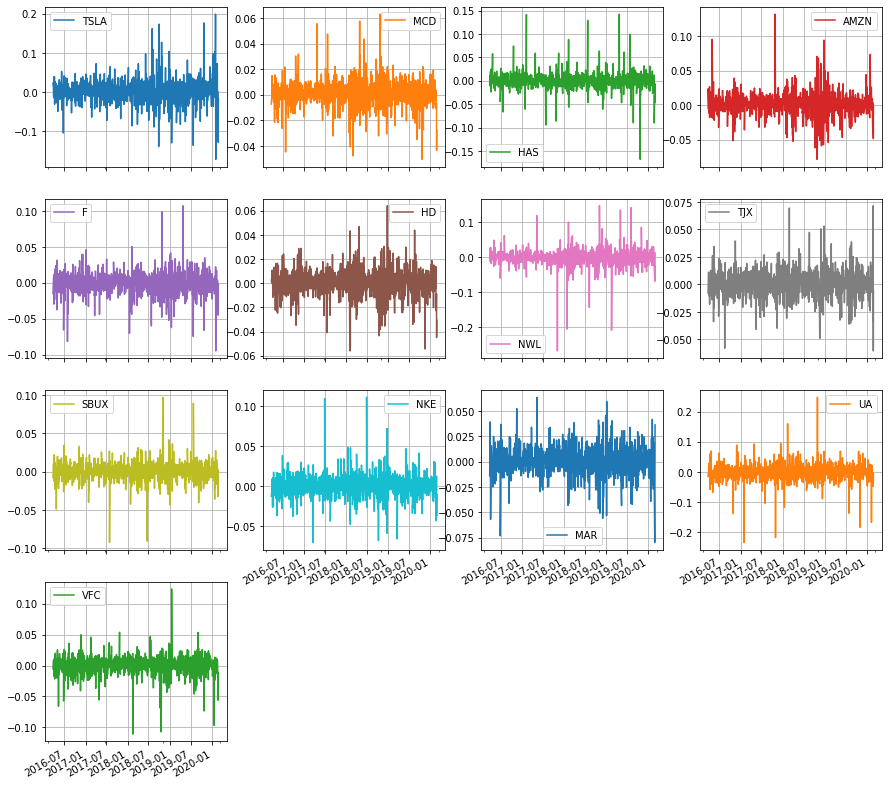

In [ ]:
# Visualize the Time Series
return_data22.plot(subplots=True,
        grid=True, 
        layout=(4,4),
         figsize=(15,15))
plt.show()

In [ ]:
# Total return (some rows were dropped so not all 5 years)
# TSLA and AMZN are the highest
return_data22.sum()

TSLA    1.573731
MCD     0.602023
HAS     0.249598
AMZN    1.337212
F      -0.283120
HD      0.666313
NWL    -0.573162
TJX     0.571831
SBUX    0.439822
NKE     0.512747
MAR     0.737419
UA     -0.764473
VFC     0.385141
dtype: float64

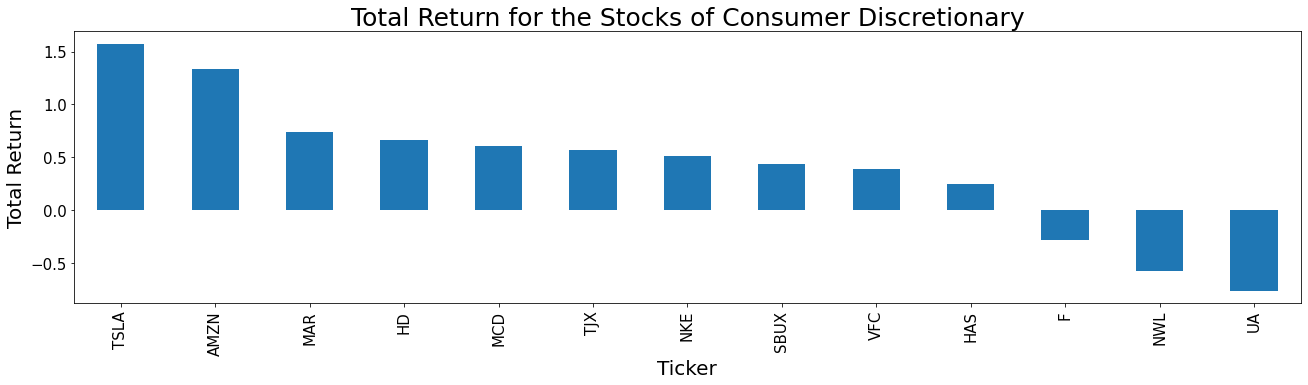

In [ ]:
# The ranking of the total return
return_data22.sum().sort_values(ascending=False, inplace=False).plot(kind='bar')
plt.title('Total Return for the Stocks of Consumer Discretionary',fontsize=25)
plt.xlabel('Ticker',fontsize=20)
plt.ylabel('Total Return',fontsize=20)
plt.tick_params(axis='x', labelsize=15, rotation=90)
plt.tick_params(axis='y', labelsize=15)

In [ ]:
# Get average return and std so that we can know what stocks have a high return (the higher the better), 
# and relatively low standard deviation (the lower the better)
# and that would be our target stock
Avg_Return_cd = pd.DataFrame(np.mean(return_data22) ,columns=["Avg_Return"])
print(Avg_Return_cd)
Std_Dev_Return_cd = pd.DataFrame(np.std(return_data22) ,columns=["Std_Dev_Return"])
print(Std_Dev_Return_cd)

      Avg_Return
TSLA    0.001590
MCD     0.000608
HAS     0.000252
AMZN    0.001351
F      -0.000286
HD      0.000673
NWL    -0.000579
TJX     0.000578
SBUX    0.000444
NKE     0.000518
MAR     0.000745
UA     -0.000772
VFC     0.000389
      Std_Dev_Return
TSLA        0.031042
MCD         0.010213
HAS         0.017953
AMZN        0.016895
F           0.015667
HD          0.011358
NWL         0.024609
TJX         0.012528
SBUX        0.012382
NKE         0.014736
MAR         0.014473
UA          0.029118
VFC         0.015469


##### C. Consumer Staples

In [ ]:
# let's extract just the data we need (adjclose)
# get the adjclose price for the KO (one sample)
prep_data33 = pd.DataFrame(dow_prices33['KO']['adjclose']).rename(columns = {"adjclose":"KO"})

# combine all the tickers (all the rest of the samples)
for i in ticker_list33[1:]:
  prep_data33[i] = pd.DataFrame(dow_prices33[i]['adjclose'])
prep_data33

,KO,PEP,PG,KHC,WMT,COST,LW,WBA,CAG,EL,MO
2015-01-02,33.559841,76.954903,73.138306,NaN,73.388664,119.534187,NaN,62.849712,22.937618,70.122597,33.121807
2015-01-05,33.559841,76.376366,72.790573,NaN,73.175087,118.175140,NaN,61.609276,22.687876,69.278419,32.932423
2015-01-06,33.814693,75.797798,72.459023,NaN,73.738937,119.736786,NaN,61.766392,22.463747,68.638321,33.128582
2015-01-07,34.236778,78.014214,72.839104,NaN,75.695419,121.821709,NaN,63.345890,22.995241,68.953735,33.737312
2015-01-08,34.650890,79.432045,73.672028,NaN,77.293030,122.868401,NaN,64.131531,23.494719,69.946358,34.305462
...,...,...,...,...,...,...,...,...,...,...,...
2020-02-24,54.976181,134.666397,117.439110,24.217840,112.619186,300.924347,92.643127,45.624134,27.453367,196.056046,37.297871
2020-02-25,54.198162,133.212509,115.658005,23.708567,110.750595,292.528503,91.136658,44.209724,26.655029,188.806763,36.182343
2020-02-26,53.991947,134.043304,114.448372,23.317514,110.159996,293.315338,89.941208,44.358608,25.302553,186.696106,35.867268
2020-02-27,51.489197,128.746902,108.104942,22.708200,106.887535,281.263794,86.937973,43.027946,24.767202,180.239227,34.317448


In [ ]:
# create return features for each ticker, 
# we will just use a pct_change as the return
return_data33 = pd.DataFrame()
for i in ticker_list33:
  return_data33[i] = prep_data33[i].pct_change()
# drop the na records
return_data33.dropna(inplace=True)
return_data33

,KO,PEP,PG,KHC,WMT,COST,LW,WBA,CAG,EL,MO
2016-11-11,0.002198,-0.000581,0.007473,-0.002580,-0.002241,0.018132,-0.014507,0.002226,0.018367,0.001918,0.000648
2016-11-14,0.003413,-0.017444,-0.006939,-0.013914,-0.010389,0.017676,0.010037,0.008760,0.016032,-0.009699,-0.009229
2016-11-15,0.006558,0.004537,0.007470,0.013237,0.013193,-0.005592,0.007950,0.023284,0.009298,0.001933,0.010132
2016-11-16,-0.004344,-0.001375,-0.005142,0.015529,-0.000420,0.006550,0.041735,-0.001080,0.012563,-0.009518,0.013752
2016-11-17,-0.003393,-0.000885,-0.001443,0.005340,-0.030817,-0.006178,0.025552,0.009616,0.006893,0.014284,0.002394
...,...,...,...,...,...,...,...,...,...,...,...
2020-02-24,-0.024613,-0.022009,-0.026835,-0.023111,-0.019059,-0.025873,0.005061,-0.047036,-0.012166,-0.050127,-0.045544
2020-02-25,-0.014152,-0.010796,-0.015166,-0.021029,-0.016592,-0.027900,-0.016261,-0.031001,-0.029080,-0.036976,-0.029909
2020-02-26,-0.003805,0.006237,-0.010459,-0.016494,-0.005333,0.002690,-0.013117,0.003368,-0.050740,-0.011179,-0.008708
2020-02-27,-0.046354,-0.039513,-0.055426,-0.026131,-0.029706,-0.041087,-0.033391,-0.029998,-0.021158,-0.034585,-0.043210


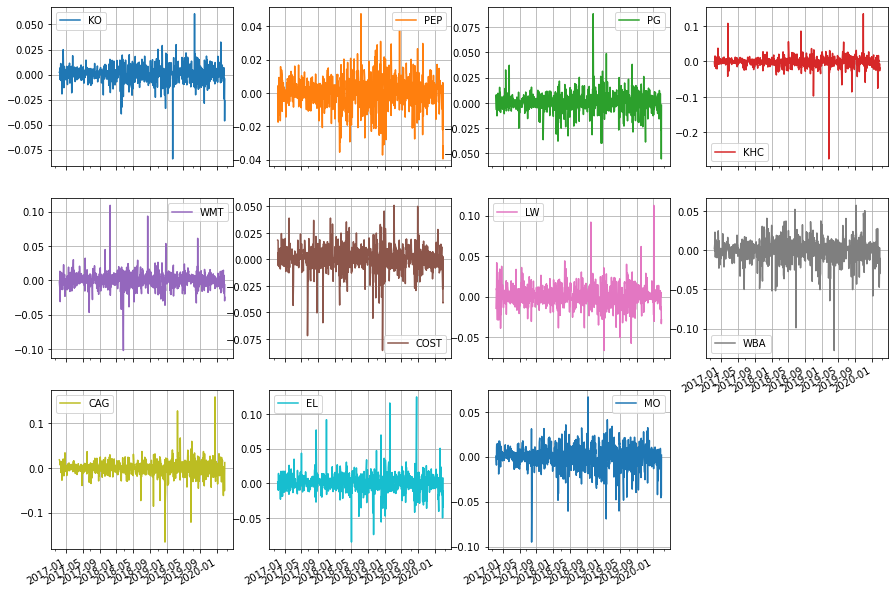

In [ ]:
# Visualize the Time Series
return_data33.plot(subplots=True,
        grid=True, 
        layout=(4,4),
         figsize=(15,15))
plt.show()

In [ ]:
# Total return (some rows were dropped so not all 5 years)
# LW is the highest
return_data33.sum()

KO      0.408134
PEP     0.377900
PG      0.451919
KHC    -0.916656
WMT     0.546721
COST    0.785679
LW      1.174165
WBA    -0.380930
CAG    -0.029846
EL      0.989839
MO     -0.183615
dtype: float64

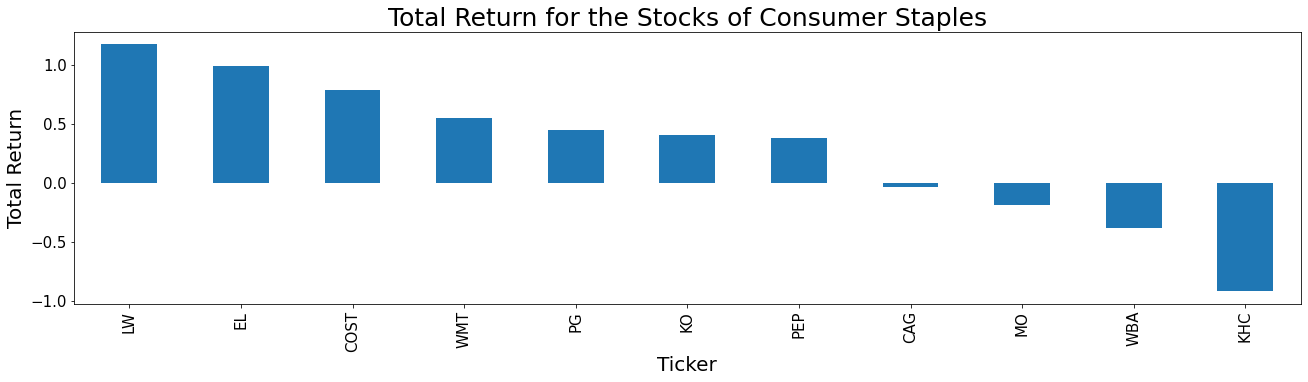

In [ ]:
# The ranking of the total return
return_data33.sum().sort_values(ascending=False, inplace=False).plot(kind='bar')
plt.title('Total Return for the Stocks of Consumer Staples',fontsize=25)
plt.xlabel('Ticker',fontsize=20)
plt.ylabel('Total Return',fontsize=20)
plt.tick_params(axis='x', labelsize=15, rotation=90)
plt.tick_params(axis='y', labelsize=15)

In [ ]:
# Get average return and std so that we can know what stocks have a high return (the higher the better), 
# and relatively low standard deviation (the lower the better)
# and that would be our target stock

Avg_Return_csta = pd.DataFrame(np.mean(return_data33) ,columns=["Avg_Return"])
print(Avg_Return_csta)
Std_Dev_Return_csta = pd.DataFrame(np.std(return_data33) ,columns=["Std_Dev_Return"])
print(Std_Dev_Return_csta)

      Avg_Return
KO      0.000493
PEP     0.000456
PG      0.000546
KHC    -0.001107
WMT     0.000660
COST    0.000949
LW      0.001418
WBA    -0.000460
CAG    -0.000036
EL      0.001195
MO     -0.000222
      Std_Dev_Return
KO          0.009031
PEP         0.009204
PG          0.010043
KHC         0.017864
WMT         0.012006
COST        0.012111
LW          0.013799
WBA         0.015476
CAG         0.018089
EL          0.015164
MO          0.013727


##### D. Financials 

In [ ]:
# let's extract just the data we need (adjclose)
# get the adjclose price for the PGR (one sample)
prep_data44 = pd.DataFrame(dow_prices44['PGR']['adjclose']).rename(columns = {"adjclose":"PGR"})

# combine all the tickers (all the rest of the samples)
for i in ticker_list44[1:]:
  prep_data44[i] = pd.DataFrame(dow_prices44[i]['adjclose'])
prep_data44

,PGR,GS,C,COF,CB,JPM,USB,MMC,BAC,WFC,AXP,MET,STT,PRU,AIG
2015-01-02,21.300022,173.058594,46.515556,72.380142,98.347939,51.583973,36.632252,49.771343,15.724233,44.256287,83.346886,37.272568,66.019470,67.963669,47.120327
2015-01-05,21.063700,167.655243,45.049618,70.712997,96.740868,49.982536,35.749752,49.421890,15.267431,43.042664,81.142693,36.028076,64.924042,65.806572,46.188171
2015-01-06,20.803751,164.263718,43.463669,69.396851,95.890099,48.686539,35.275806,48.757915,14.810641,42.144604,79.413399,34.935696,63.070286,64.441422,45.533134
2015-01-07,21.236996,166.711639,43.866585,70.186546,97.256508,48.760818,35.586319,49.404408,14.880923,42.395412,81.147789,35.398914,63.660145,64.479118,45.751476
2015-01-08,21.662369,169.373306,44.526688,70.870934,98.829193,49.850456,35.847801,50.234364,15.188376,43.333935,82.298080,35.938198,65.008316,65.512444,45.549934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-24,75.489372,215.476562,67.567253,95.295319,153.725845,124.457367,49.240334,109.775482,31.273098,44.268166,124.609154,45.698105,69.725487,79.682602,42.759811
2020-02-25,74.585014,208.826279,64.679382,89.998985,150.584091,118.901237,47.051041,107.625114,29.696548,43.056263,117.522797,44.032318,66.748413,76.262321,42.329407
2020-02-26,74.258728,207.070114,63.514904,90.037788,151.369537,119.259087,46.067722,109.058670,29.266577,42.121086,115.189827,43.421524,66.079514,74.320824,42.104847
2020-02-27,71.116814,197.387421,60.040119,86.497192,143.783340,114.296234,44.082523,103.527771,27.833347,40.527470,109.658775,40.617455,65.363518,70.328987,40.617146


In [ ]:
# create return features for each ticker, 
# we will just use a pct_change as the return
return_data44 = pd.DataFrame()
for i in ticker_list44:
  return_data44[i] = prep_data44[i].pct_change()
# drop the na records
return_data44.dropna(inplace=True)
return_data44

,PGR,GS,C,COF,CB,JPM,USB,MMC,BAC,WFC,AXP,MET,STT,PRU,AIG
2015-01-05,-0.011095,-0.031223,-0.031515,-0.023033,-0.016341,-0.031045,-0.024091,-0.007021,-0.029051,-0.027423,-0.026446,-0.033389,-0.016593,-0.031739,-0.019782
2015-01-06,-0.012341,-0.020229,-0.035204,-0.018613,-0.008794,-0.025929,-0.013257,-0.013435,-0.029919,-0.020864,-0.021312,-0.030320,-0.028553,-0.020745,-0.014182
2015-01-07,0.020825,0.014902,0.009270,0.011379,0.014250,0.001526,0.008802,0.013259,0.004745,0.005951,0.021840,0.013259,0.009352,0.000585,0.004795
2015-01-08,0.020030,0.015966,0.015048,0.009751,0.016170,0.022347,0.007348,0.016799,0.020661,0.022137,0.014175,0.015234,0.021178,0.016026,-0.004405
2015-01-09,-0.021091,-0.015347,-0.022333,-0.017333,-0.014174,-0.017387,-0.020743,-0.013739,-0.017930,-0.016430,-0.012667,-0.018468,-0.014518,-0.017730,-0.016962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-24,-0.006015,-0.026364,-0.051152,-0.028769,-0.019908,-0.026876,-0.026948,-0.025956,-0.047439,-0.027464,-0.049740,-0.036112,-0.040451,-0.051512,-0.059671
2020-02-25,-0.011980,-0.030863,-0.042741,-0.055578,-0.020437,-0.044643,-0.044461,-0.019589,-0.050412,-0.027376,-0.056869,-0.036452,-0.042697,-0.042924,-0.010066
2020-02-26,-0.004375,-0.008410,-0.018004,0.000431,0.005216,0.003010,-0.020899,0.013320,-0.014479,-0.021720,-0.019851,-0.013871,-0.010021,-0.025458,-0.005305
2020-02-27,-0.042310,-0.046760,-0.054708,-0.039323,-0.050117,-0.041614,-0.043093,-0.050715,-0.048972,-0.037834,-0.048017,-0.064578,-0.010835,-0.053711,-0.035333


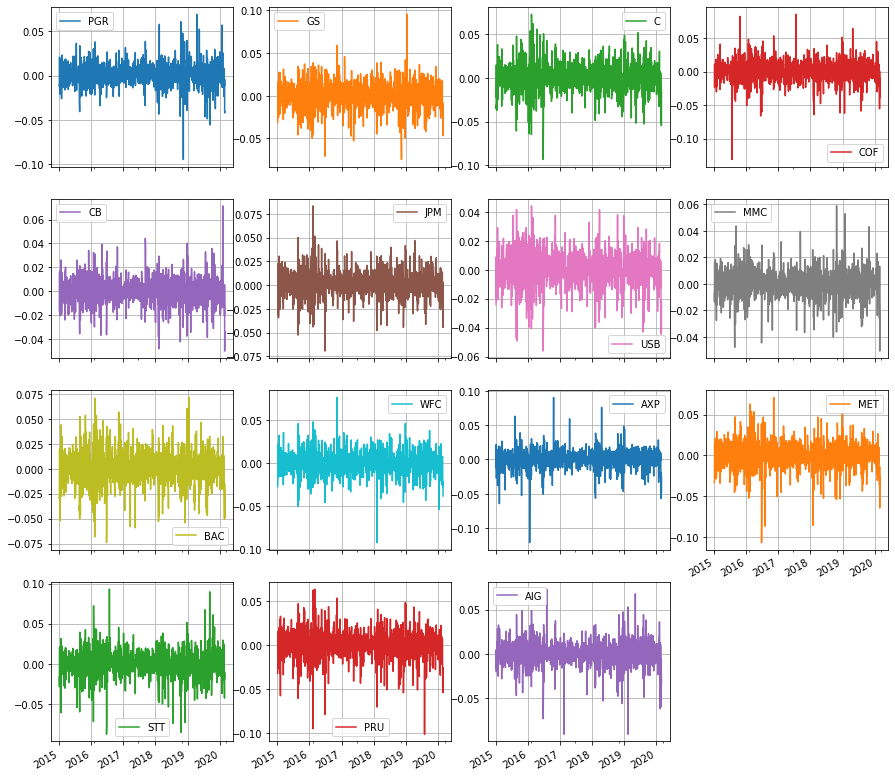

In [ ]:
# Visualize the Time Series
return_data44.plot(subplots=True,
        grid=True, 
        layout=(4,4),
         figsize=(15,15))
plt.show()

In [ ]:
# Total return (some rows were dropped so not all 5 years)
# PGR is the highest
return_data44.sum()

PGR    1.261826
GS     0.259834
C      0.401390
COF    0.327224
CB     0.419315
JPM    0.866925
USB    0.248946
MMC    0.778520
BAC    0.720927
WFC   -0.010421
AXP    0.362053
MET    0.218534
STT    0.149334
PRU    0.172478
AIG   -0.053936
dtype: float64

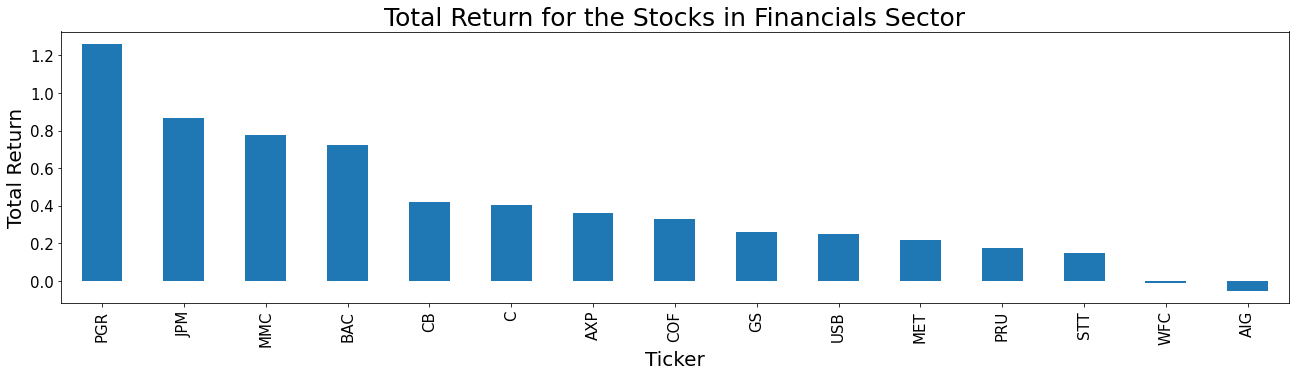

In [ ]:
# The ranking of the total return
return_data44.sum().sort_values(ascending=False, inplace=False).plot(kind='bar')
plt.title('Total Return for the Stocks in Financials Sector',fontsize=25)
plt.xlabel('Ticker',fontsize=20)
plt.ylabel('Total Return',fontsize=20)
plt.tick_params(axis='x', labelsize=15, rotation=90)
plt.tick_params(axis='y', labelsize=15)

In [ ]:
# Get average return and std so that we can know what stocks have a high return (the higher the better), 
# and relatively low standard deviation (the lower the better)
# and that would be our target stock

Avg_Return_fin = pd.DataFrame(np.mean(return_data44) ,columns=["Avg_Return"])
print(Avg_Return_fin)
Std_Dev_Return_fin = pd.DataFrame(np.std(return_data44) ,columns=["Std_Dev_Return"])
print(Std_Dev_Return_fin)

     Avg_Return
PGR    0.000973
GS     0.000200
C      0.000309
COF    0.000252
CB     0.000323
JPM    0.000668
USB    0.000192
MMC    0.000600
BAC    0.000556
WFC   -0.000008
AXP    0.000279
MET    0.000168
STT    0.000115
PRU    0.000133
AIG   -0.000042
     Std_Dev_Return
PGR        0.012248
GS         0.015008
C          0.015763
COF        0.015627
CB         0.010675
JPM        0.013341
USB        0.011550
MMC        0.010225
BAC        0.016256
WFC        0.013387
AXP        0.013186
MET        0.015628
STT        0.016523
PRU        0.015903
AIG        0.013774


##### E. Health Care

In [ ]:
# let's extract just the data we need (adjclose)
# get the adjclose price for the CVS (one sample)
prep_data55 = pd.DataFrame(dow_prices55['CVS']['adjclose']).rename(columns = {"adjclose":"CVS"})

# combine all the tickers (all the rest of the samples)
for i in ticker_list55[1:]:
  prep_data55[i] = pd.DataFrame(dow_prices55[i]['adjclose'])
prep_data55

,CVS,BIIB,BMY,ILMN,GILD,REGN,MRK,MCK,SYK,AMGN,ABT,PFE,MDT,UNH,DHR,CERN,ABBV,A
2015-01-02,79.395409,342.010010,48.787346,185.419998,76.621178,410.160004,43.846756,194.715302,86.294693,132.200027,39.116329,22.779913,62.170166,90.382698,62.594830,63.089573,48.308903,38.134747
2015-01-05,78.610657,336.739990,48.024914,190.720001,78.138901,412.470001,44.498436,196.312805,84.963371,130.629059,39.125034,22.656307,61.910725,88.893951,61.974148,62.255238,47.399773,37.420181
2015-01-06,78.669067,334.649994,47.942928,188.309998,78.833183,396.890015,46.246487,195.861801,84.844048,126.420563,38.680721,22.845358,61.599346,88.714607,61.550610,61.624638,47.165154,36.837269
2015-01-07,80.088341,353.239990,48.566002,194.919998,80.310532,407.720001,47.235500,201.810333,86.450752,130.835754,38.994347,23.158001,63.138885,89.620369,61.923023,62.274635,49.071415,37.326180
2015-01-08,81.791473,350.250000,49.779320,196.820007,82.587158,403.250000,48.186192,204.112732,87.919754,130.364471,39.795845,23.630619,64.652489,93.898270,62.879627,63.642563,49.584621,38.445011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-24,64.289680,325.980011,60.049118,281.119995,67.184906,425.380005,72.580986,162.353577,210.800476,207.117203,82.107101,30.491636,106.481323,269.503021,155.691284,71.732262,84.476082,79.422607
2020-02-25,60.891575,324.109985,58.331284,269.950012,64.604408,442.350006,71.635010,157.734802,201.764053,199.987656,78.711441,29.840820,103.784622,255.532639,150.558472,70.784042,80.884453,76.906746
2020-02-26,59.301361,327.450012,58.237411,274.700012,68.843788,457.920013,71.340508,155.901001,197.216522,203.942184,78.934578,30.535610,101.508690,255.154221,151.094574,70.784042,80.186073,77.064598
2020-02-27,56.158817,310.079987,55.928192,259.929993,66.963722,431.609985,69.680595,144.849289,190.556610,193.447525,76.829269,29.990330,96.564735,246.345108,145.991592,68.320625,77.474220,76.393700


In [ ]:
# create return features for each ticker, 
# we will just use a pct_change as the return
return_data55 = pd.DataFrame()
for i in ticker_list55:
  return_data55[i] = prep_data55[i].pct_change()
# drop the na records
return_data55.dropna(inplace=True)
return_data55

,CVS,BIIB,BMY,ILMN,GILD,REGN,MRK,MCK,SYK,AMGN,ABT,PFE,MDT,UNH,DHR,CERN,ABBV,A
2015-01-05,-0.009884,-0.015409,-0.015628,0.028584,0.019808,0.005632,0.014863,0.008204,-0.015428,-0.011883,0.000223,-0.005426,-0.004173,-0.016472,-0.009916,-0.013225,-0.018819,-0.018738
2015-01-06,0.000743,-0.006207,-0.001707,-0.012636,0.008885,-0.037772,0.039283,-0.002297,-0.001404,-0.032217,-0.011356,0.008344,-0.005029,-0.002018,-0.006834,-0.010129,-0.004950,-0.015577
2015-01-07,0.018041,0.055551,0.012996,0.035102,0.018740,0.027287,0.021386,0.030371,0.018937,0.034925,0.008108,0.013685,0.024993,0.010210,0.006051,0.010548,0.040417,0.013272
2015-01-08,0.021266,-0.008464,0.024983,0.009748,0.028348,-0.010963,0.020127,0.011409,0.016992,-0.003602,0.020554,0.020408,0.023973,0.047734,0.015448,0.021966,0.010458,0.029974
2015-01-09,-0.000510,-0.022584,-0.006588,-0.010263,-0.000880,0.019318,-0.004614,-0.002440,-0.012114,-0.012304,-0.010508,0.004615,-0.004682,-0.009360,-0.006736,-0.009908,-0.027354,-0.007337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-24,-0.050203,-0.031867,-0.025293,-0.050078,0.045911,0.055141,-0.012266,-0.031586,-0.039010,-0.022039,-0.032247,-0.029395,-0.017037,-0.078426,-0.031258,-0.035362,-0.019166,-0.053720
2020-02-25,-0.052856,-0.005737,-0.028607,-0.039734,-0.038409,0.039894,-0.013033,-0.028449,-0.042867,-0.034423,-0.041356,-0.021344,-0.025326,-0.051838,-0.032968,-0.013219,-0.042517,-0.031677
2020-02-26,-0.026115,0.010305,-0.001609,0.017596,0.065621,0.035198,-0.004111,-0.011626,-0.022539,0.019774,0.002835,0.023283,-0.021929,-0.001481,0.003561,0.000000,-0.008634,0.002053
2020-02-27,-0.052993,-0.053046,-0.039652,-0.053768,-0.027309,-0.057456,-0.023267,-0.070889,-0.033770,-0.051459,-0.026672,-0.017857,-0.048705,-0.034525,-0.033773,-0.034802,-0.033820,-0.008706


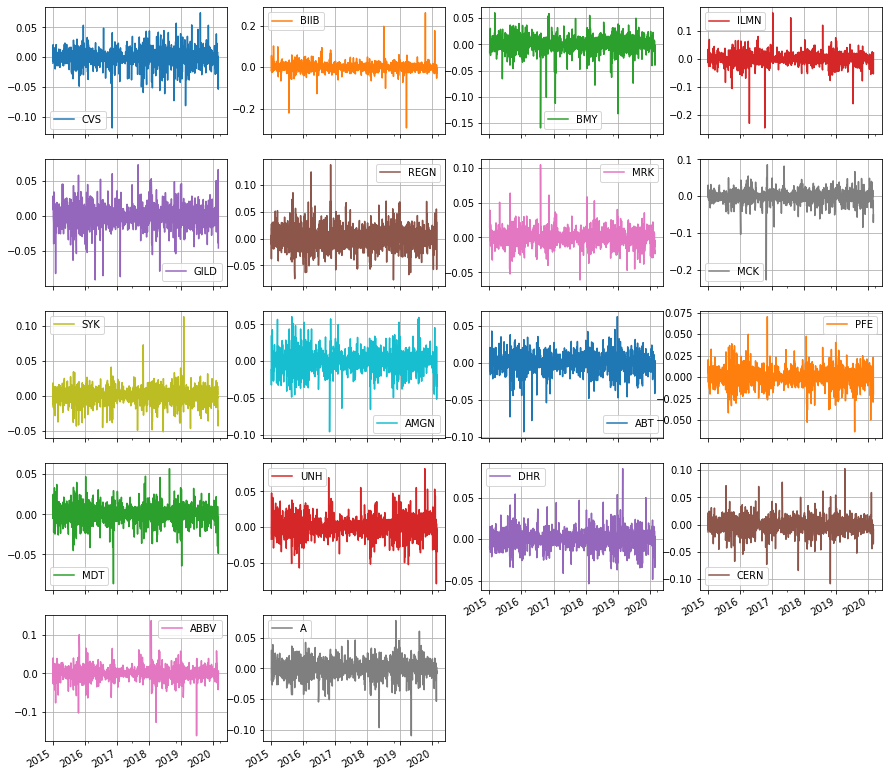

In [ ]:
# Visualize the Time Series
return_data55.plot(subplots=True,
        grid=True, 
        layout=(5,4),
         figsize=(15,15))
plt.show()

In [ ]:
# Total return (some rows were dropped so not all 5 years)
# UNH is the highest
return_data55.sum()

CVS    -0.198384
BIIB    0.267966
BMY     0.299329
ILMN    0.734997
GILD   -0.013148
REGN    0.362440
MRK     0.541528
MCK    -0.133240
SYK     0.870954
AMGN    0.504086
ABT     0.759627
PFE     0.340140
MDT     0.527679
UNH     1.136511
DHR     0.913786
CERN    0.218330
ABBV    0.685531
A       0.828457
dtype: float64

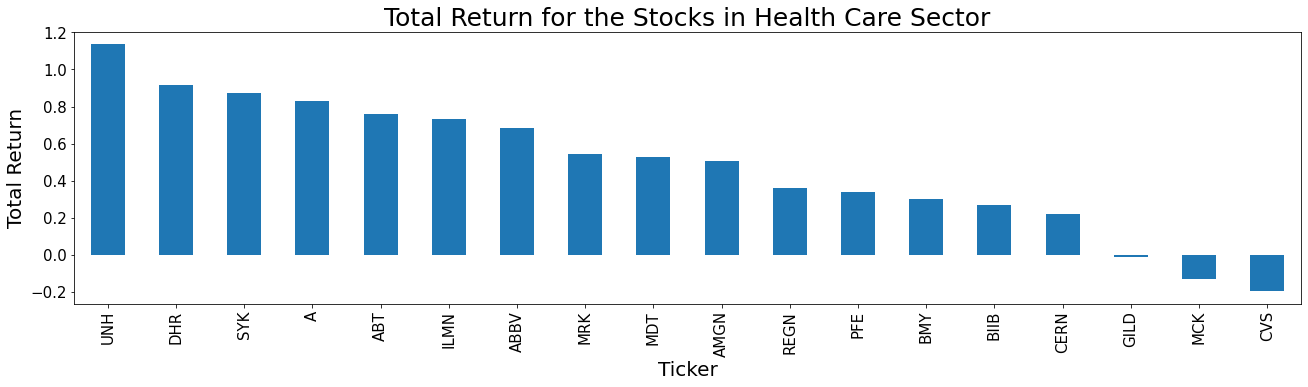

In [ ]:
# The ranking of the total return
return_data55.sum().sort_values(ascending=False, inplace=False).plot(kind='bar')
plt.title('Total Return for the Stocks in Health Care Sector',fontsize=25)
plt.xlabel('Ticker',fontsize=20)
plt.ylabel('Total Return',fontsize=20)
plt.tick_params(axis='x', labelsize=15, rotation=90)
plt.tick_params(axis='y', labelsize=15)

In [ ]:
# Get average return and std so that we can know what stocks have a high return (the higher the better), 
# and relatively low standard deviation (the lower the better)
# and that would be our target stock

Avg_Return_hc = pd.DataFrame(np.mean(return_data55) ,columns=["Avg_Return"])
print(Avg_Return_hc)
Std_Dev_Return_hc = pd.DataFrame(np.std(return_data55) ,columns=["Std_Dev_Return"])
print(Std_Dev_Return_hc)

      Avg_Return
CVS    -0.000153
BIIB    0.000207
BMY     0.000231
ILMN    0.000567
GILD   -0.000010
REGN    0.000279
MRK     0.000418
MCK    -0.000103
SYK     0.000672
AMGN    0.000389
ABT     0.000586
PFE     0.000262
MDT     0.000407
UNH     0.000876
DHR     0.000705
CERN    0.000168
ABBV    0.000529
A       0.000639
      Std_Dev_Return
CVS         0.015169
BIIB        0.023719
BMY         0.016083
ILMN        0.023703
GILD        0.016054
REGN        0.020917
MRK         0.012304
MCK         0.017941
SYK         0.012463
AMGN        0.014788
ABT         0.013099
PFE         0.011464
MDT         0.011779
UNH         0.014129
DHR         0.011368
CERN        0.015063
ABBV        0.017903
A           0.014545


##### F. Industrials 

In [ ]:
# let's extract just the data we need (adjclose)
# get the adjclose price for the WM (one sample)
prep_data66 = pd.DataFrame(dow_prices66['WM']['adjclose']).rename(columns = {"adjclose":"WM"})

# combine all the tickers (all the rest of the samples)
for i in ticker_list66[1:]:
  prep_data66[i] = pd.DataFrame(dow_prices66[i]['adjclose'])
prep_data66

,WM,BA,ETN,UNP,DAL,GE,JCI,FTV,MMM,IR,CAT,LMT,CSX,PCAR
2015-01-02,44.409153,113.657227,55.766521,101.684731,44.267323,167.903992,34.269051,NaN,133.949753,NaN,74.313873,159.951126,10.646878,52.483139
2015-01-05,43.962914,112.870056,53.459690,98.246948,43.529232,164.821976,33.750416,NaN,130.928848,NaN,70.391136,156.624893,10.358802,50.719582
2015-01-06,43.997238,111.540619,52.860397,96.215149,42.503117,161.270920,33.381088,NaN,129.532700,NaN,69.938194,155.888458,9.945993,50.788883
2015-01-07,44.031563,113.272377,53.016376,96.746658,42.278076,161.337936,33.915432,NaN,130.471619,NaN,71.021988,157.899170,10.076669,51.466579
2015-01-08,44.537876,115.275269,54.912750,100.373047,43.376213,163.280930,34.567646,NaN,133.598633,NaN,71.749947,161.457123,10.237040,52.144287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-24,119.719147,317.899994,97.430885,169.840363,54.230000,94.104012,39.817242,60.234615,143.839783,36.547375,125.949814,396.838745,25.391895,68.802307
2020-02-25,117.749420,304.140015,94.133667,164.163025,50.889999,89.819351,37.732170,58.349949,138.465240,35.717659,122.928993,378.868103,24.581928,66.210266
2020-02-26,116.764557,305.589996,92.571320,159.225357,49.590000,86.883560,37.598263,58.740166,140.454758,35.737656,122.214310,379.379181,24.497355,65.671059
2020-02-27,109.706345,287.760010,89.369942,154.239288,48.189999,82.440208,36.249664,58.416050,141.586273,33.598392,117.468666,363.954193,23.589928,64.110153


In [ ]:
# create return features for each ticker, 
# we will just use a pct_change as the return
return_data66 = pd.DataFrame()
for i in ticker_list66:
  return_data66[i] = prep_data66[i].pct_change()
# drop the na records
return_data66.dropna(inplace=True)
return_data66

,WM,BA,ETN,UNP,DAL,GE,JCI,FTV,MMM,IR,CAT,LMT,CSX,PCAR
2017-05-15,0.002918,-0.004693,0.003782,0.007241,0.010615,-0.003183,0.009753,0.000643,0.005392,0.043602,0.016979,0.004018,-0.015343,0.006470
2017-05-16,-0.012748,0.001700,0.003508,-0.002516,0.000000,-0.004968,-0.008952,0.001768,0.001417,0.003633,-0.000781,-0.002570,-0.004285,0.010348
2017-05-17,-0.007299,-0.021456,-0.013723,-0.040000,-0.031781,-0.022468,-0.017590,-0.018129,-0.009632,0.000000,-0.021497,-0.008872,-0.032277,-0.012619
2017-05-18,0.003252,-0.007719,-0.001444,0.005443,-0.001676,0.002554,0.010646,-0.000654,0.002053,0.018099,0.000799,-0.007131,0.015363,-0.016567
2017-05-19,-0.006483,0.018940,0.025503,-0.000840,0.011330,0.020743,0.019870,0.011118,0.002868,0.009778,0.022051,0.020463,0.002986,0.008022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-24,-0.004576,-0.037775,-0.031259,-0.027075,-0.062900,-0.031837,-0.019317,-0.043002,-0.027911,-0.053095,-0.036732,-0.019752,-0.018854,-0.034899
2020-02-25,-0.016453,-0.043284,-0.033842,-0.033427,-0.061590,-0.045531,-0.052366,-0.031289,-0.037365,-0.022702,-0.023984,-0.045284,-0.031899,-0.037674
2020-02-26,-0.008364,0.004767,-0.016597,-0.030078,-0.025545,-0.032686,-0.003549,0.006688,0.014368,0.000560,-0.005814,0.001349,-0.003440,-0.008144
2020-02-27,-0.060448,-0.058346,-0.034583,-0.031315,-0.028232,-0.051141,-0.035869,-0.005518,0.008056,-0.059860,-0.038831,-0.040658,-0.037042,-0.023769


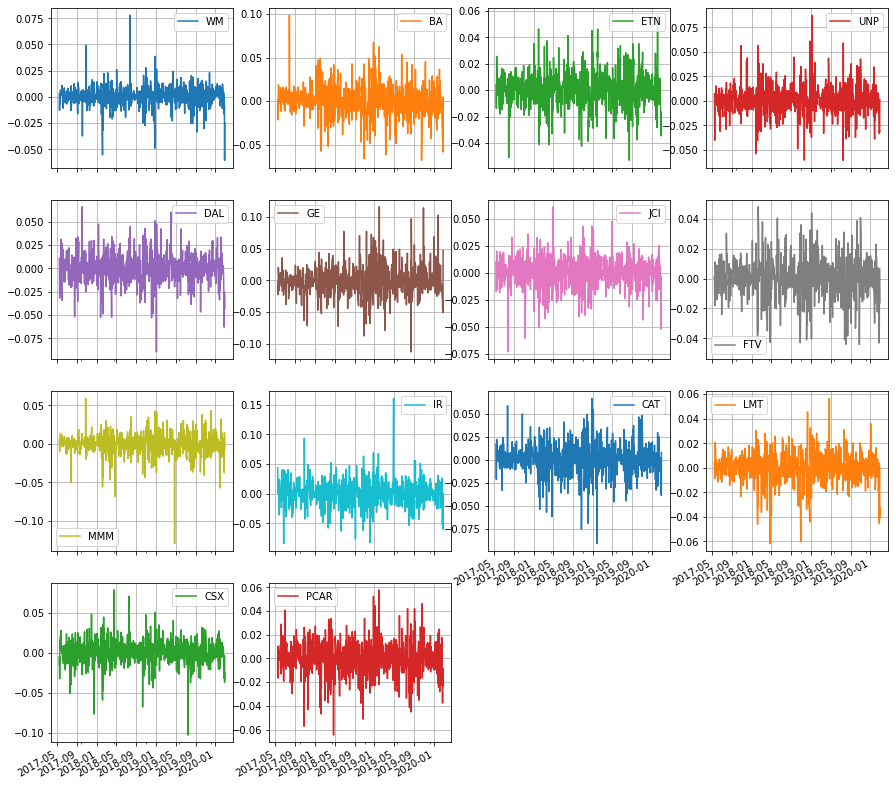

In [ ]:
# Visualize the Time Series
return_data66.plot(subplots=True,
        grid=True, 
        layout=(4,4),
         figsize=(15,15))
plt.show()

In [ ]:
# Total return (some rows were dropped so not all 5 years)
# IR (0.6) is the highest
return_data66.sum()

WM      0.522178
BA      0.577661
ETN     0.298968
UNP     0.513454
DAL     0.107123
GE     -0.662296
JCI     0.006319
FTV     0.179500
MMM    -0.117749
IR      0.603893
CAT     0.385447
LMT     0.437120
CSX     0.427178
PCAR    0.259105
dtype: float64

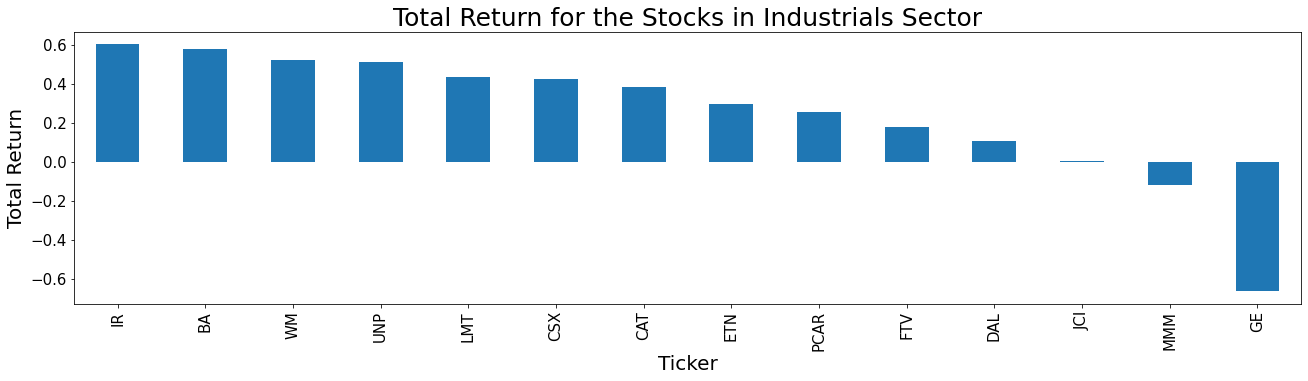

In [ ]:
# The ranking of the total return
return_data66.sum().sort_values(ascending=False, inplace=False).plot(kind='bar')
plt.title('Total Return for the Stocks in Industrials Sector',fontsize=25)
plt.xlabel('Ticker',fontsize=20)
plt.ylabel('Total Return',fontsize=20)
plt.tick_params(axis='x', labelsize=15, rotation=90)
plt.tick_params(axis='y', labelsize=15)

In [ ]:
# Get average return and std so that we can know what stocks have a high return (the higher the better), 
# and relatively low standard deviation (the lower the better)
# and that would be our target stock

Avg_Return_indus = pd.DataFrame(np.mean(return_data66) ,columns=["Avg_Return"])
print(Avg_Return_indus)
Std_Dev_Return_indus = pd.DataFrame(np.std(return_data66) ,columns=["Std_Dev_Return"])
print(Std_Dev_Return_indus)

      Avg_Return
WM      0.000743
BA      0.000822
ETN     0.000425
UNP     0.000730
DAL     0.000152
GE     -0.000942
JCI     0.000009
FTV     0.000255
MMM    -0.000167
IR      0.000859
CAT     0.000548
LMT     0.000622
CSX     0.000608
PCAR    0.000369
      Std_Dev_Return
WM          0.009843
BA          0.017830
ETN         0.013459
UNP         0.014955
DAL         0.016150
GE          0.023643
JCI         0.014156
FTV         0.013221
MMM         0.014263
IR          0.021584
CAT         0.017256
LMT         0.012040
CSX         0.015424
PCAR        0.014458


##### G. Information Technology

In [ ]:
# let's extract just the data we need (adjclose)
# get the adjclose price for the IBM (one sample)
prep_data77 = pd.DataFrame(dow_prices77['IBM']['adjclose']).rename(columns = {"adjclose":"IBM"})

# combine all the tickers (all the rest of the samples)
for i in ticker_list77[1:]:
  prep_data77[i] = pd.DataFrame(dow_prices77[i]['adjclose'])
prep_data77

,IBM,NVDA,INTC,TEL,AAPL,LRCX,MCHP,PYPL,ADI,V,QCOM,HPQ,CSCO,MA,AKAM,ORCL,ACN,MSFT
2015-01-02,113.538857,4.839470,29.850739,55.084339,24.714510,71.203255,19.608568,NaN,47.608597,63.115112,59.418430,14.759810,22.179895,81.896545,63.250000,39.534664,78.595978,41.193832
2015-01-05,111.752365,4.757731,29.514145,54.011776,24.018263,70.333961,19.171558,NaN,46.742821,61.721924,59.138470,14.514057,21.738056,79.592987,61.939999,38.980228,77.268944,40.815033
2015-01-06,109.342285,4.613484,28.964079,53.357773,24.020523,69.159927,18.800104,NaN,45.645611,61.324219,58.298527,14.404017,21.730028,79.420921,60.669998,38.577824,76.711601,40.215965
2015-01-07,108.627663,4.601463,29.571611,54.962257,24.357340,69.518417,18.904987,NaN,46.125637,62.145828,58.978474,14.572747,21.930857,80.656349,60.160000,38.586784,78.321739,40.726929
2015-01-08,110.988724,4.774559,30.121660,56.069698,25.293207,71.319771,19.508053,NaN,46.939972,62.979362,59.602425,14.921197,22.099560,81.910919,61.570000,38.819271,79.516075,41.925045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-24,126.442162,68.147934,58.581520,85.532028,73.534546,292.913361,48.989723,116.440002,113.103477,196.332611,79.769653,20.758650,41.386234,321.359680,97.110001,50.991955,198.927841,168.151001
2020-02-25,122.366463,65.347504,56.655994,83.842552,71.043785,284.880310,47.546406,109.660004,110.501404,186.071030,76.801743,21.932781,40.201084,299.801819,93.730003,49.355175,191.860779,165.376236
2020-02-26,120.674019,66.743973,56.580112,83.658089,72.170792,289.150299,46.367283,109.110001,110.674850,184.895767,76.265617,21.331625,39.655540,295.001221,92.540001,50.410851,190.468811,167.442535
2020-02-27,114.940361,63.028629,52.956711,80.774330,67.453117,278.524078,43.974796,107.839996,104.376617,177.784744,72.704117,20.552002,37.661476,282.905792,89.309998,49.180843,181.484177,155.644730


In [ ]:
# create return features for each ticker, 
# we will just use a pct_change as the return
return_data77 = pd.DataFrame()
for i in ticker_list77:
  return_data77[i] = prep_data77[i].pct_change()
# drop the na records
return_data77.dropna(inplace=True)
return_data77

,IBM,NVDA,INTC,TEL,AAPL,LRCX,MCHP,PYPL,ADI,V,QCOM,HPQ,CSCO,MA,AKAM,ORCL,ACN,MSFT
2015-07-07,0.001639,-0.018840,-0.004661,-0.004395,-0.002460,-0.012078,-0.002185,-0.002452,-0.003303,-0.005138,-0.004912,0.007524,0.005143,-0.004981,0.005017,0.000249,0.013766,-0.002027
2015-07-08,-0.011152,-0.007074,-0.013378,-0.026328,-0.024823,-0.027570,-0.021458,-0.052430,-0.022720,-0.015346,-0.014172,-0.011363,-0.013523,-0.014911,-0.017829,-0.009711,-0.010742,-0.001354
2015-07-09,0.004229,-0.012214,-0.019322,-0.000486,-0.020397,-0.004105,-0.011412,-0.005764,-0.016952,0.004795,-0.000808,-0.001971,-0.002964,0.005946,0.006390,0.010309,0.001332,0.006329
2015-07-10,0.018920,0.017517,0.008296,0.011016,0.026734,0.011593,0.015165,0.005507,0.010182,0.020432,0.014064,0.008555,0.013750,0.016982,0.009812,0.004480,0.010537,0.002022
2015-07-13,0.014555,0.006582,0.019198,0.002243,0.019306,0.009424,0.002229,0.060248,0.005853,0.016077,0.011159,0.002936,0.018695,0.009300,0.024150,0.010902,0.017919,0.020847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-24,-0.022758,-0.070697,-0.040099,-0.039682,-0.047500,-0.051578,-0.047107,-0.025525,-0.043988,-0.047986,-0.042629,-0.026432,-0.049676,-0.044245,-0.033924,-0.037125,-0.035537,-0.043116
2020-02-25,-0.032234,-0.041093,-0.032869,-0.019753,-0.033872,-0.027425,-0.029462,-0.058227,-0.023006,-0.052266,-0.037206,0.056561,-0.028636,-0.067083,-0.034806,-0.032099,-0.035526,-0.016502
2020-02-26,-0.013831,0.021370,-0.001339,-0.002200,0.015864,0.014989,-0.024799,-0.005016,0.001570,-0.006316,-0.006981,-0.027409,-0.013570,-0.016013,-0.012696,0.021389,-0.007255,0.012495
2020-02-27,-0.047514,-0.055666,-0.064040,-0.034471,-0.065368,-0.036750,-0.051599,-0.011640,-0.056908,-0.038460,-0.046699,-0.036548,-0.050285,-0.041001,-0.034904,-0.024400,-0.047171,-0.070459


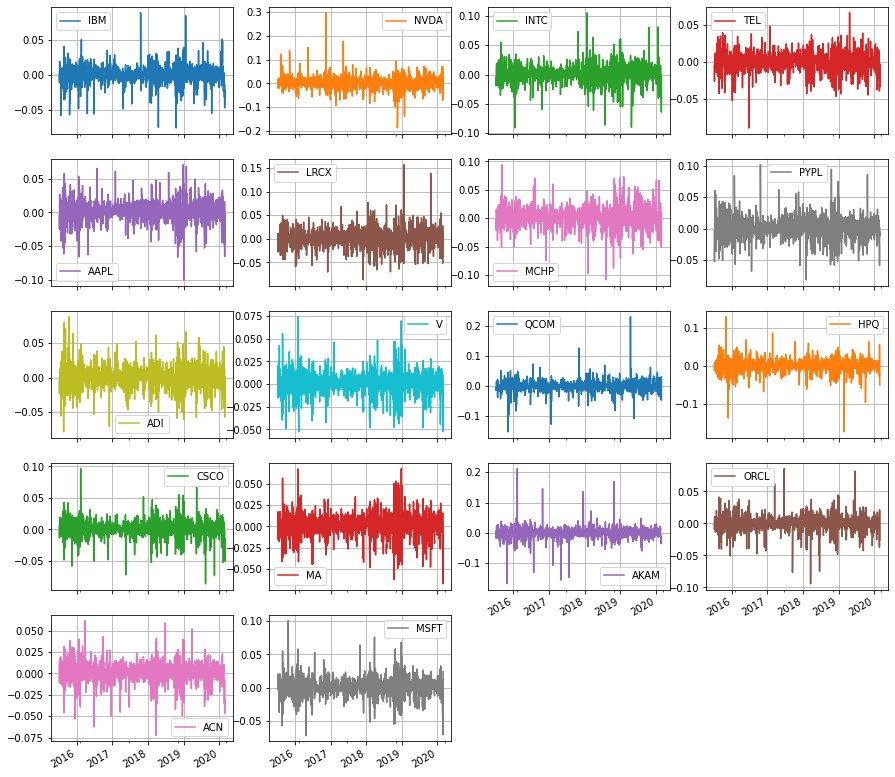

In [ ]:
# Visualize the Time Series
return_data77.plot(subplots=True,
        grid=True, 
        layout=(5,4),
         figsize=(15,15))
plt.show()

In [ ]:
# Total return (some rows were dropped so not all 5 years)
# NVDA, LRCX, MSFT, PYPL, and MA are the highest (V and AAPL are also larger than 100%)
return_data77.sum()

IBM     0.062950
NVDA    3.071428
INTC    0.903947
TEL     0.470179
AAPL    1.003796
LRCX    1.621868
MCHP    0.991086
PYPL    1.268856
ADI     0.819733
V       1.115431
QCOM    0.624379
HPQ     0.751176
CSCO    0.647673
MA      1.268351
AKAM    0.467706
ORCL    0.384845
ACN     0.791968
MSFT    1.516199
dtype: float64

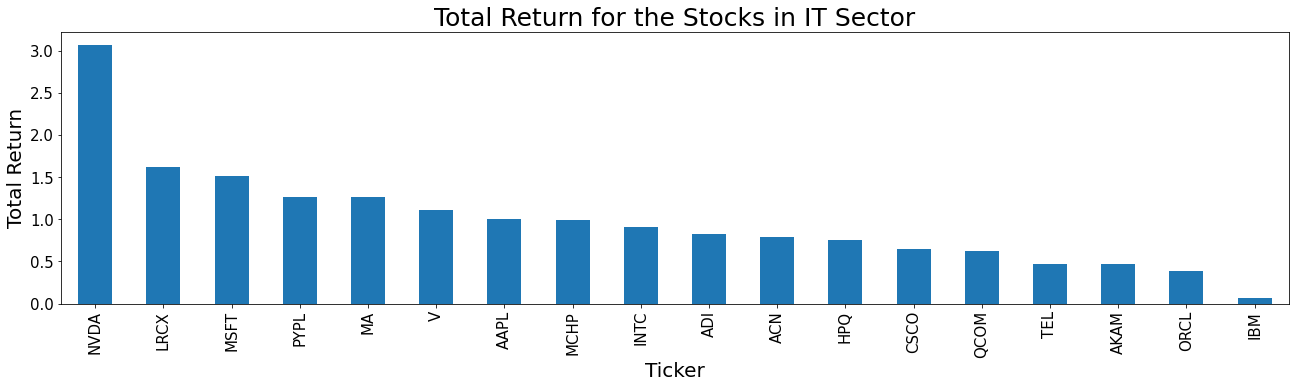

In [ ]:
# The ranking of the total return
return_data77.sum().sort_values(ascending=False, inplace=False).plot(kind='bar')
plt.title('Total Return for the Stocks in IT Sector',fontsize=25)
plt.xlabel('Ticker',fontsize=20)
plt.ylabel('Total Return',fontsize=20)
plt.tick_params(axis='x', labelsize=15, rotation=90)
plt.tick_params(axis='y', labelsize=15)

In [ ]:
# Get average return and std so that we can know what stocks have a high return (the higher the better), 
# and relatively low standard deviation (the lower the better)
# and that would be our target stock

Avg_Return_it = pd.DataFrame(np.mean(return_data77) ,columns=["Avg_Return"])
print(Avg_Return_it)
Std_Dev_Return_it = pd.DataFrame(np.std(return_data77) ,columns=["Std_Dev_Return"])
print(Std_Dev_Return_it)

      Avg_Return
IBM     0.000054
NVDA    0.002623
INTC    0.000772
TEL     0.000402
AAPL    0.000857
LRCX    0.001385
MCHP    0.000846
PYPL    0.001084
ADI     0.000700
V       0.000953
QCOM    0.000533
HPQ     0.000641
CSCO    0.000553
MA      0.001083
AKAM    0.000399
ORCL    0.000329
ACN     0.000676
MSFT    0.001295
      Std_Dev_Return
IBM         0.013308
NVDA        0.027771
INTC        0.016491
TEL         0.013584
AAPL        0.015979
LRCX        0.021016
MCHP        0.018830
PYPL        0.018002
ADI         0.017057
V           0.013128
QCOM        0.020372
HPQ         0.018651
CSCO        0.014401
MA          0.013981
AKAM        0.020748
ORCL        0.013277
ACN         0.012288
MSFT        0.014548


##### H. Materials, Real Estate, and Utilities

In [ ]:
# let's extract just the data we need (adjclose)
# get the adjclose price for the DD (one sample)
prep_data88 = pd.DataFrame(dow_prices88['DD']['adjclose']).rename(columns = {"adjclose":"DD"})

# combine all the tickers (all the rest of the samples)
for i in ticker_list88[1:]:
  prep_data88[i] = pd.DataFrame(dow_prices88[i]['adjclose'])
prep_data88

,DD,DLR,PSA,WEC,SO
2015-01-02,54.297474,51.317219,147.244614,42.291721,35.873730
2015-01-05,52.618160,52.306309,147.936676,41.774914,35.721138
2015-01-06,51.772560,52.144047,150.461151,41.886215,36.149857
2015-01-07,51.689186,52.561317,153.544006,42.403034,36.549500
2015-01-08,52.975471,53.249043,155.635895,42.872154,36.578568
...,...,...,...,...,...
2020-02-24,48.551102,127.044968,212.130219,96.072311,62.914055
2020-02-25,45.683270,125.420166,206.894180,94.741913,62.041790
2020-02-26,45.481171,122.452301,213.778778,94.628685,61.420078
2020-02-27,43.650684,115.699493,197.930115,90.165680,58.348602


In [ ]:
# create return features for each ticker, 
# we will just use a pct_change as the return
return_data88 = pd.DataFrame()
for i in ticker_list88:
  return_data88[i] = prep_data88[i].pct_change()
# drop the na records
return_data88.dropna(inplace=True)
return_data88

,DD,DLR,PSA,WEC,SO
2015-01-05,-0.030928,0.019274,0.004700,-0.012220,-0.004254
2015-01-06,-0.016070,-0.003102,0.017065,0.002664,0.012002
2015-01-07,-0.001610,0.008002,0.020489,0.012339,0.011055
2015-01-08,0.024885,0.013084,0.013624,0.011063,0.000795
2015-01-09,-0.001574,-0.010594,0.003032,-0.005564,-0.012714
...,...,...,...,...,...
2020-02-24,-0.037765,-0.020705,0.003100,-0.006634,-0.017249
2020-02-25,-0.059068,-0.012789,-0.024683,-0.013848,-0.013864
2020-02-26,-0.004424,-0.023663,0.033276,-0.001195,-0.010021
2020-02-27,-0.040247,-0.055146,-0.074136,-0.047163,-0.050008


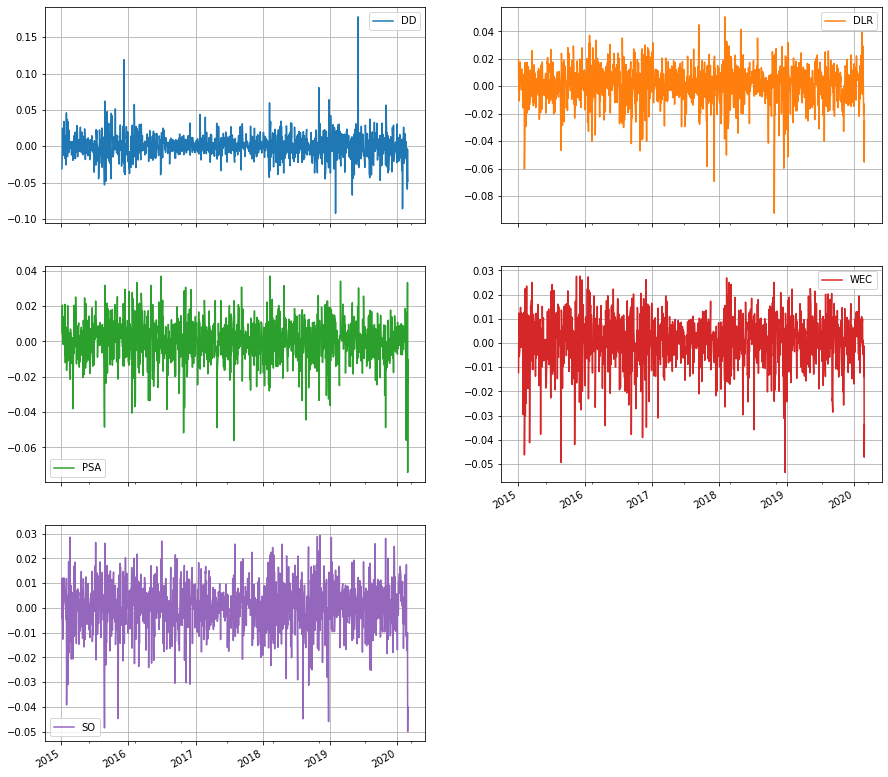

In [ ]:
# Visualize the Time Series
return_data88.plot(subplots=True,
        grid=True, 
        layout=(3,2),
         figsize=(15,15))
plt.show()

In [ ]:
# Total return (some rows were dropped so not all 5 years)
# DLR (0.91) is the highest
return_data88.sum()

DD    -0.081736
DLR    0.912719
PSA    0.378360
WEC    0.794762
SO     0.510656
dtype: float64

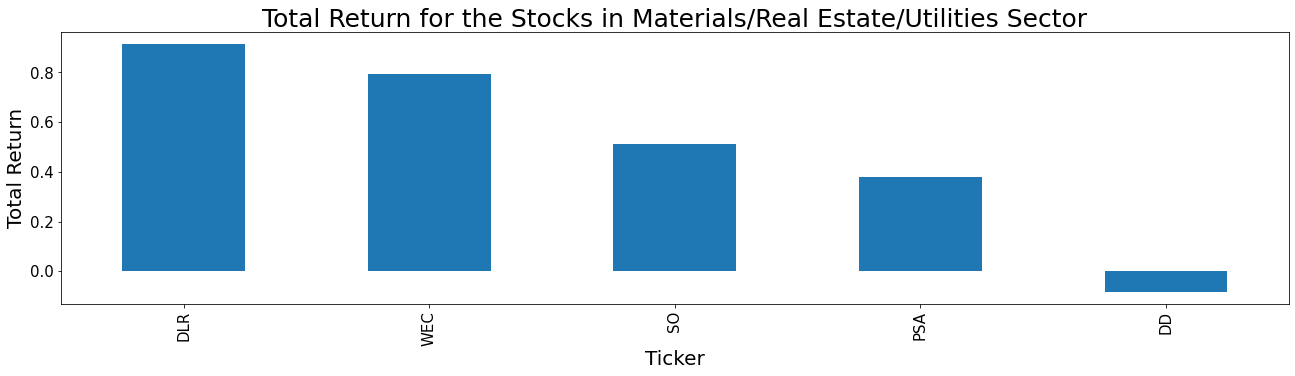

In [ ]:
# The ranking of the total return
return_data88.sum().sort_values(ascending=False, inplace=False).plot(kind='bar')
plt.title('Total Return for the Stocks in Materials/Real Estate/Utilities Sector',fontsize=25)
plt.xlabel('Ticker',fontsize=20)
plt.ylabel('Total Return',fontsize=20)
plt.tick_params(axis='x', labelsize=15, rotation=90)
plt.tick_params(axis='y', labelsize=15)

In [ ]:
# Get average return and std so that we can know what stocks have a high return (the higher the better), 
# and relatively low standard deviation (the lower the better)
# and that would be our target stock

Avg_Return_mtre = pd.DataFrame(np.mean(return_data88) ,columns=["Avg_Return"])
print(Avg_Return_mtre)
Std_Dev_Return_mtre = pd.DataFrame(np.std(return_data88) ,columns=["Std_Dev_Return"])
print(Std_Dev_Return_mtre)

     Avg_Return
DD    -0.000063
DLR    0.000704
PSA    0.000292
WEC    0.000613
SO     0.000394
     Std_Dev_Return
DD         0.017003
DLR        0.013823
PSA        0.011937
WEC        0.010501
SO         0.009996


## Plot 3
Visualization of our average return for all the senator's stocks.
*Note: Need to run the "Pull data from Yahoo Finance by sector" first*

### Visualize the average return for all the senator's stocks. 

In [ ]:
# Combine all the average return in one platform

Avg_Return = pd.concat([Avg_Return_mtre, Avg_Return_it,Avg_Return_indus,Avg_Return_hc,Avg_Return_fin,Avg_Return_csta,Avg_Return_cd,Avg_Return_cs])
Std_Dev_Return = pd.concat([Std_Dev_Return_mtre, Std_Dev_Return_it,Std_Dev_Return_indus,Std_Dev_Return_hc,Std_Dev_Return_fin,Std_Dev_Return_csta,Std_Dev_Return_cd,Std_Dev_Return_cs])

Avg_Return.head()

,Avg_Return
DD,-0.000063
DLR,0.000704
PSA,0.000292
WEC,0.000613
SO,0.000394


In [ ]:
# Combine all the std_return in one platform
Std_Dev_Return.head()

,Std_Dev_Return
DD,0.017003
DLR,0.013823
PSA,0.011937
WEC,0.010501
SO,0.009996


In [ ]:
# Join Avg_Return and Std_Dev_Return and get all the info for all the tickers

mergeticker = Avg_Return.join(Std_Dev_Return)
print(mergeticker.shape)
mergeticker.head(5)

(104, 2)


,Avg_Return,Std_Dev_Return
DD,-0.000063,0.017003
DLR,0.000704,0.013823
PSA,0.000292,0.011937
WEC,0.000613,0.010501
SO,0.000394,0.009996


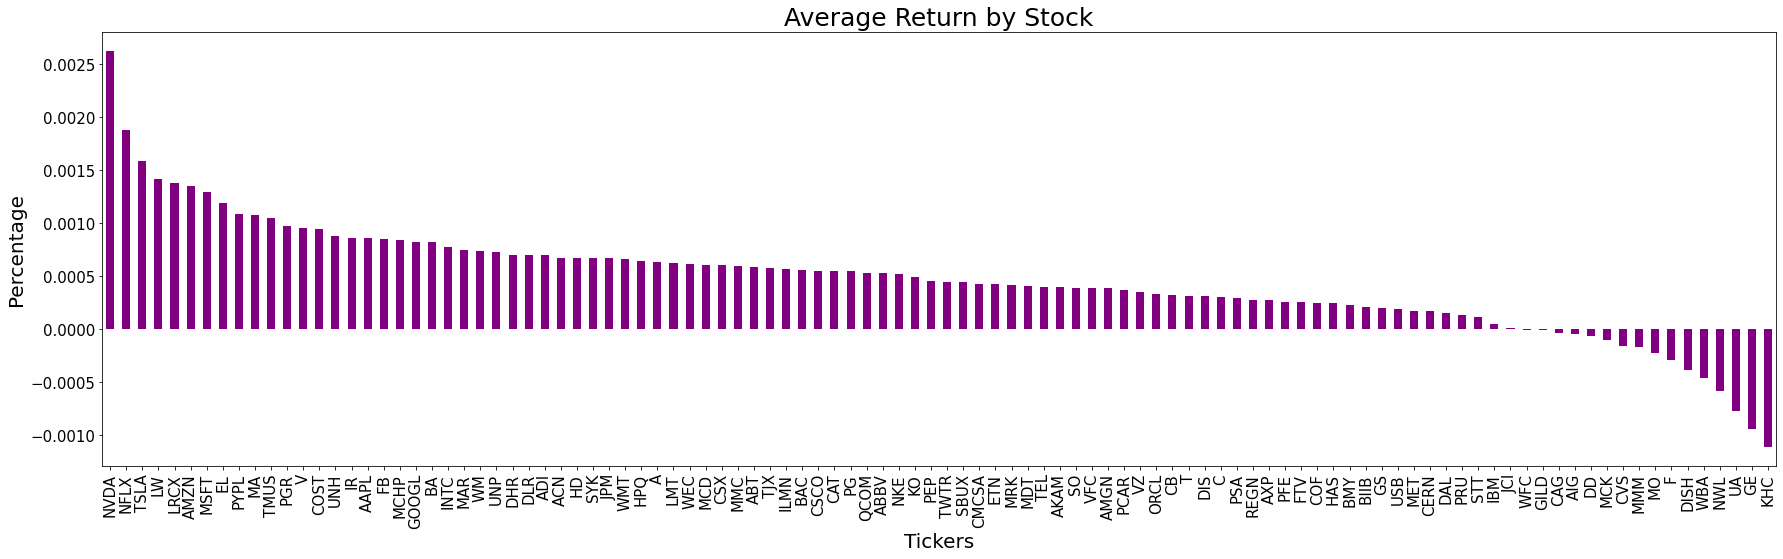

In [ ]:
# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (30,8)
mergeticke_all = mergeticker.sort_values(by=['Avg_Return'], axis=0, ascending=True)
pd.Series(mergeticke_all['Avg_Return']).sort_values(ascending=False).plot(kind='bar', color='purple')

# add titles, headers, and legend to histogram
plt.title('Average Return by Stock', fontsize=25)
plt.xlabel('Tickers', fontsize=20)
plt.ylabel('Percentage', fontsize=20)
plt.tick_params(axis='x', labelsize=15, rotation=90)
plt.tick_params(axis='y', labelsize=15)
plt.show()

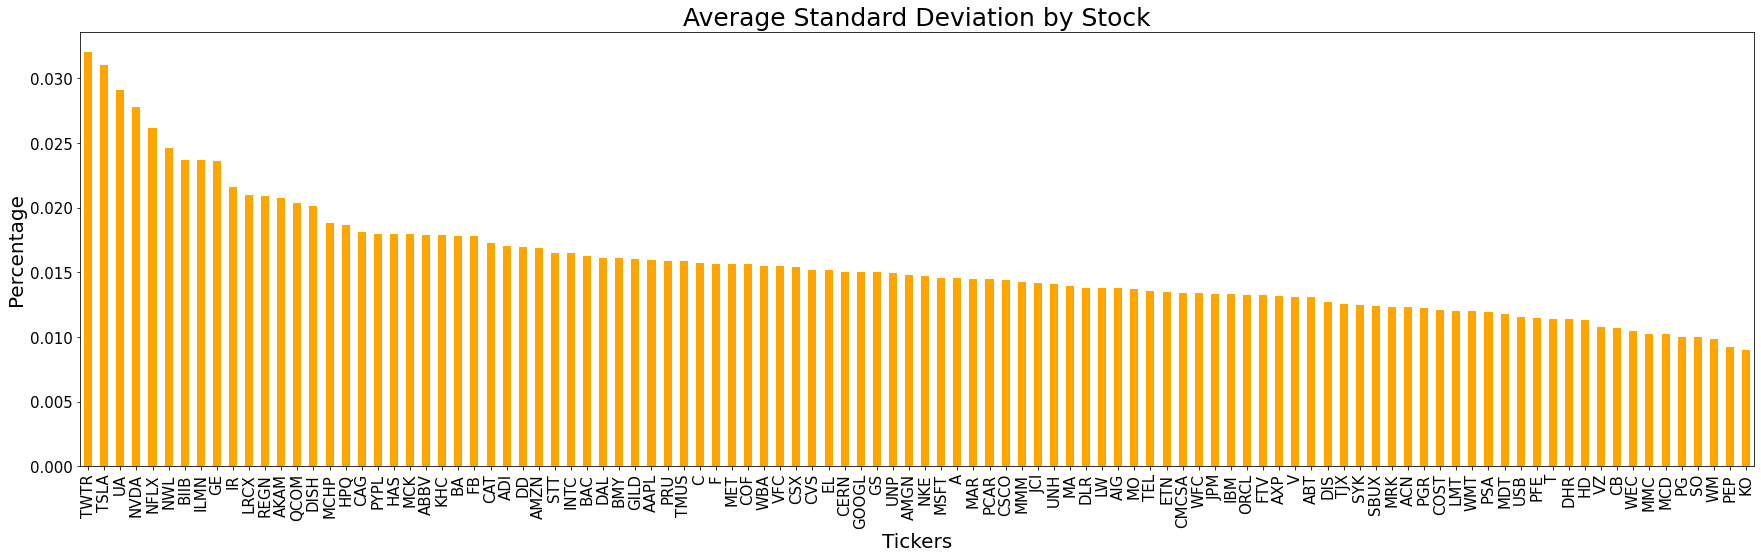

In [ ]:
# Visualize the average std for all the senator's stocks. 
# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (30,8)
mergeticke_all = mergeticker.sort_values(by=['Std_Dev_Return'], axis=0, ascending=True)
pd.Series(mergeticke_all['Std_Dev_Return']).sort_values(ascending=False).plot(kind='bar', color='orange')

# add titles, headers, and legend to histogram
plt.title('Average Standard Deviation by Stock', fontsize=25)
plt.xlabel('Tickers', fontsize=20)
plt.ylabel('Percentage', fontsize=20)
plt.tick_params(axis='x', labelsize=15, rotation=90)
plt.tick_params(axis='y', labelsize=15)
plt.show()

**Conclusion**: <br>
Majority of the senator's stocks have a pretty good average return. When we select the stocks, stocks with negative average return were ruled out immediately. For other stocks, we organize and pick one stock from each sector to build our model.



# Model

## Picking 10 Stocks

If we go based on the data shown above and choose the stocks that have the highest return while keeping the portfolio diverse, we decided to pick the top tickers for return with one in each sector of the S&P 500. We did combine Materials, Real Estate, and Utilities from our stock choice because they are historically low on returns and low on risk.  
We chose to look into NFLX, FB, TSLA, AMZN, LW, PGR, UNH, IR, NVDA, and DLR.

In [ ]:
#pull in yahoo finance data 
!pip install yahoo_fin
!pip install requests_html
import yahoo_fin.stock_info as si

# Assign the ticker list that we chose 
tickers_list = ['NFLX', 'FB', 'TSLA', 'AMZN', 'LW', 'PGR', 'UNH', 'IR', 'NVDA', 'DLR']
# pull historical price data for each stocks to match with our news score later
dow_prices = {ticker : si.get_data(ticker,start_date = '01/01/2015',end_date='03/01/2020',interval='1d') for ticker in tickers_list}

dow_prices

{'AMZN':                    open         high          low  ...     adjclose   volume  ticker
 2015-01-02   312.579987   314.750000   306.959991  ...   308.519989  2783200    AMZN
 2015-01-05   307.010010   308.380005   300.850006  ...   302.190002  2774200    AMZN
 2015-01-06   302.239990   303.000000   292.380005  ...   295.290009  3519000    AMZN
 2015-01-07   297.500000   301.279999   295.329987  ...   298.420013  2640300    AMZN
 2015-01-08   300.320007   303.140015   296.109985  ...   300.459991  3088400    AMZN
 ...                 ...          ...          ...  ...          ...      ...     ...
 2020-02-24  2003.180054  2039.300049  1987.969971  ...  2009.290039  6547000    AMZN
 2020-02-25  2026.420044  2034.599976  1958.420044  ...  1972.739990  6219100    AMZN
 2020-02-26  1970.280029  2014.670044  1960.449951  ...  1979.589966  5224600    AMZN
 2020-02-27  1934.380005  1975.000000  1882.760010  ...  1884.300049  8144000    AMZN
 2020-02-28  1814.630005  1889.760010  1811.13

In [ ]:
# get the adjclose price for the NFLX (one sample)
prep_data = pd.DataFrame(dow_prices['NFLX']['adjclose']).rename(columns = {"adjclose":"NFLX"})

# combine all the tickers (all the rest of the samples)
for i in tickers_list[1:]:
  prep_data[i] = pd.DataFrame(dow_prices[i]['adjclose'])
prep_data

,NFLX,FB,TSLA,AMZN,LW,PGR,UNH,IR,NVDA,DLR
2015-01-02,49.848572,78.449997,43.862000,308.519989,NaN,21.300020,90.382698,NaN,4.839471,51.317223
2015-01-05,47.311428,77.190002,42.018002,302.190002,NaN,21.063704,88.893967,NaN,4.757731,52.306316
2015-01-06,46.501431,76.150002,42.256001,295.290009,NaN,20.803753,88.714584,NaN,4.613485,52.144051
2015-01-07,46.742859,76.150002,42.189999,298.420013,NaN,21.237000,89.620384,NaN,4.601465,52.561317
2015-01-08,47.779999,78.180000,42.124001,300.459991,NaN,21.662374,93.898270,NaN,4.774561,53.249054
...,...,...,...,...,...,...,...,...,...,...
2020-02-24,368.700012,200.720001,166.757996,2009.290039,92.643135,75.489372,269.502960,36.547375,68.147926,127.044975
2020-02-25,360.089996,196.770004,159.981995,1972.739990,91.136658,74.585022,255.532639,35.717659,65.347496,125.420151
2020-02-26,379.239990,197.199997,155.759995,1979.589966,89.941200,74.258713,255.154236,35.737656,66.743973,122.452309
2020-02-27,371.709991,189.750000,135.800003,1884.300049,86.937973,71.116821,246.345108,33.598392,63.028629,115.699493


In [ ]:
# create return features for each ticker, 
# we will just use a pct_change as the return
return_data = pd.DataFrame()
for i in tickers_list:
  return_data[i] = prep_data[i].pct_change()
# drop the na records
return_data.dropna(inplace=True)
return_data

,NFLX,FB,TSLA,AMZN,LW,PGR,UNH,IR,NVDA,DLR
2017-05-15,-0.004913,-0.000931,-0.027493,-0.003516,0.017298,0.006003,-0.001630,0.043602,0.050199,0.007647
2017-05-16,-0.003812,-0.002730,0.003577,0.008455,0.035873,-0.002486,-0.019880,0.003633,0.018614,-0.006382
2017-05-17,-0.038956,-0.032915,-0.034384,-0.022058,-0.006746,0.025922,0.004401,0.000000,-0.066443,-0.000087
2017-05-18,0.016319,0.019399,0.022704,0.014533,-0.005207,0.009961,0.015338,0.018099,0.041889,-0.004774
2017-05-19,0.008478,0.002709,-0.007123,0.001409,0.010014,-0.011306,0.006649,0.009778,0.023095,0.001570
...,...,...,...,...,...,...,...,...,...,...
2020-02-24,-0.029916,-0.045009,-0.074595,-0.041356,0.005061,-0.006015,-0.078426,-0.053095,-0.070698,-0.020705
2020-02-25,-0.023352,-0.019679,-0.040634,-0.018191,-0.016261,-0.011980,-0.051837,-0.022702,-0.041093,-0.012789
2020-02-26,0.053181,0.002185,-0.026390,0.003472,-0.013117,-0.004375,-0.001481,0.000560,0.021370,-0.023663
2020-02-27,-0.019855,-0.037779,-0.128146,-0.048136,-0.033391,-0.042310,-0.034525,-0.059860,-0.055666,-0.055146


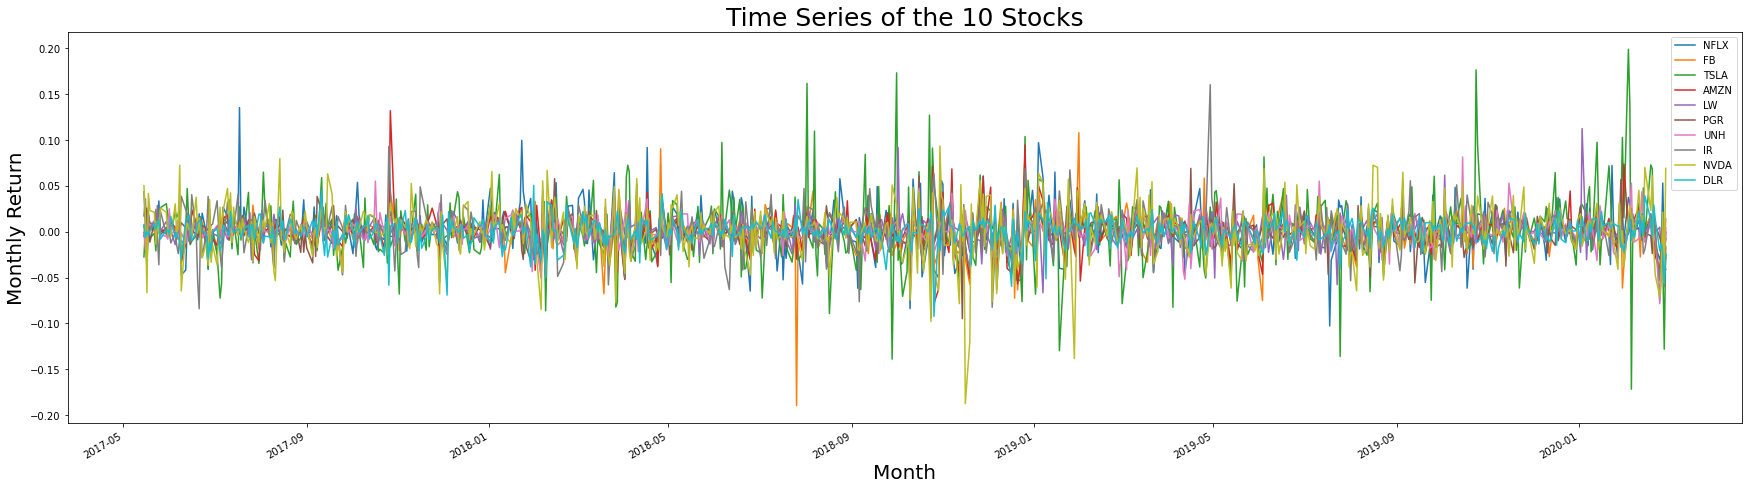

In [ ]:
# Visualize the time series
return_data.plot()
plt.title('Time Series of the 10 Stocks',fontsize=25)
plt.xlabel('Month',fontsize=20)
plt.ylabel('Monthly Return',fontsize=20)
plt.show() 

##Covariance

A way that we can balance our portfolio is to look at how different stocks vary with each other. In this project, covariance represents risk. Therefore, we need to compute the covariance of the portfolio (the covariance matrix) so that we can run the model to get the efficient frontier that shows the range of outcomes of profit we could achieve for all risk levels.
 
Covariance is related to correlation - but is not the same thing! Covariance is a numeric representation of how much things vary together. Correlation is covariance divided by standard deviation. In this project, we will just use the covariance matrix.

In [ ]:
# Find the average return and std for all 10 stocks
Avg_Return = pd.DataFrame(np.mean(return_data) ,columns=["Avg_Return"])
print(Avg_Return)
Std_Dev_Return = pd.DataFrame(np.std(return_data) ,columns=["Std_Dev_Return"])
print(Std_Dev_Return)

      Avg_Return
NFLX    0.001475
FB      0.000540
TSLA    0.001608
AMZN    0.001122
LW      0.001171
PGR     0.001089
UNH     0.000730
IR      0.000859
NVDA    0.001461
DLR     0.000298
      Std_Dev_Return
NFLX        0.024250
FB          0.019236
TSLA        0.034245
AMZN        0.018167
LW          0.013919
PGR         0.013692
UNH         0.014762
IR          0.021584
NVDA        0.027450
DLR         0.014061


In [ ]:
#now show covariance matrix
Covariance_matrix = return_data.cov()
Covariance_matrix

,NFLX,FB,TSLA,AMZN,LW,PGR,UNH,IR,NVDA,DLR
NFLX,0.000589,0.000216,0.000256,0.000271,0.000046,0.000089,0.000115,0.000131,0.000325,0.000059
FB,0.000216,0.000371,0.000167,0.000202,0.000031,0.000059,0.000072,0.000111,0.000262,0.000068
TSLA,0.000256,0.000167,0.001174,0.000194,0.000044,0.000056,0.000077,0.000136,0.000292,0.000080
AMZN,0.000271,0.000202,0.000194,0.000331,0.000034,0.000079,0.000096,0.000122,0.000283,0.000068
LW,0.000046,0.000031,0.000044,0.000034,0.000194,0.000029,0.000029,0.000037,0.000043,0.000039
PGR,0.000089,0.000059,0.000056,0.000079,0.000029,0.000188,0.000051,0.000082,0.000100,0.000035
UNH,0.000115,0.000072,0.000077,0.000096,0.000029,0.000051,0.000218,0.000089,0.000121,0.000044
IR,0.000131,0.000111,0.000136,0.000122,0.000037,0.000082,0.000089,0.000467,0.000199,0.000026
NVDA,0.000325,0.000262,0.000292,0.000283,0.000043,0.000100,0.000121,0.000199,0.000755,0.000070
DLR,0.000059,0.000068,0.000080,0.000068,0.000039,0.000035,0.000044,0.000026,0.000070,0.000198


In [ ]:
# here is correlarion matrix 
Corr_matrix = return_data.corr()
Corr_matrix

,NFLX,FB,TSLA,AMZN,LW,PGR,UNH,IR,NVDA,DLR
NFLX,1.000000,0.462452,0.307914,0.613489,0.136060,0.267637,0.319938,0.249735,0.487827,0.173969
FB,0.462452,1.000000,0.253753,0.578473,0.115523,0.224048,0.252989,0.266938,0.494993,0.250058
TSLA,0.307914,0.253753,1.000000,0.311248,0.091693,0.120051,0.151326,0.183717,0.310006,0.166279
AMZN,0.613489,0.578473,0.311248,1.000000,0.133561,0.317705,0.358147,0.309748,0.566927,0.267461
LW,0.136060,0.115523,0.091693,0.133561,1.000000,0.152555,0.140202,0.122795,0.111416,0.198611
PGR,0.267637,0.224048,0.120051,0.317705,0.152555,1.000000,0.249831,0.276868,0.265962,0.182533
UNH,0.319938,0.252989,0.151326,0.358147,0.140202,0.249831,1.000000,0.277792,0.298055,0.210112
IR,0.249735,0.266938,0.183717,0.309748,0.122795,0.276868,0.277792,1.000000,0.335853,0.083983
NVDA,0.487827,0.494993,0.310006,0.566927,0.111416,0.265962,0.298055,0.335853,1.000000,0.180438
DLR,0.173969,0.250058,0.166279,0.267461,0.198611,0.182533,0.210112,0.083983,0.180438,1.000000


##Building Model for Nonlinear optimization 

We are trying to run model to access different risk ceilings. 

In [ ]:
# install pyomo
!pip install -q pyomo
from pyomo.environ import *

try:
    import google.colab
    try:
        from pyomo.environ import *
    except:
        !pip install -q pyomo
    if not 'ipopt_executable' in vars():
        !wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
        !unzip -o -q ipopt-linux64
        ipopt_executable = '/content/ipopt' # THIS IS NEW! We are using the IPOPT Solver.
except:
    pass

     |████████████████████████████████| 9.2 MB 6.3 MB/s 
     |████████████████████████████████| 49 kB 5.0 MB/s 


In [ ]:
# creating covariance table on stock return dataframe
stocks_cov = return_data.cov()
print('Covariance Matrix:')
print(stocks_cov)
print('\n') # return/blank line

# create the average return of each stock
# these are the objective function coefficients
stocks_return = return_data.mean()
print('Average Return:')
print(stocks_return)

Covariance Matrix:
          NFLX        FB      TSLA  ...        IR      NVDA       DLR
NFLX  0.000589  0.000216  0.000256  ...  0.000131  0.000325  0.000059
FB    0.000216  0.000371  0.000167  ...  0.000111  0.000262  0.000068
TSLA  0.000256  0.000167  0.001174  ...  0.000136  0.000292  0.000080
AMZN  0.000271  0.000202  0.000194  ...  0.000122  0.000283  0.000068
LW    0.000046  0.000031  0.000044  ...  0.000037  0.000043  0.000039
PGR   0.000089  0.000059  0.000056  ...  0.000082  0.000100  0.000035
UNH   0.000115  0.000072  0.000077  ...  0.000089  0.000121  0.000044
IR    0.000131  0.000111  0.000136  ...  0.000467  0.000199  0.000026
NVDA  0.000325  0.000262  0.000292  ...  0.000199  0.000755  0.000070
DLR   0.000059  0.000068  0.000080  ...  0.000026  0.000070  0.000198

[10 rows x 10 columns]


Average Return:
NFLX    0.001475
FB      0.000540
TSLA    0.001608
AMZN    0.001122
LW      0.001171
PGR     0.001089
UNH     0.000730
IR      0.000859
NVDA    0.001461
DLR     0.000298

In [ ]:
# create concrete model
from pyomo.environ import *
m = ConcreteModel()

# defining variables
# each one is the stock's proportion (NFLX, FB, TSLA, AMZN, LW, PGR, UNH, IR, NVDA, DLR)
# Lower bound for each proportion is equal to 0 (0 means not investing) 
# Upper bound for each proportion is equal to 1 (1 means invest all money into one stock)
# will define the sum of all proportions = 1 below
m.NFLX = Var(within=NonNegativeReals, bounds=(0,1))
m.FB = Var(within=NonNegativeReals, bounds=(0,1))
m.TSLA = Var(within=NonNegativeReals, bounds=(0,1))
m.AMZN = Var(within=NonNegativeReals, bounds=(0,1))
m.LW = Var(within=NonNegativeReals, bounds=(0,1))
m.PGR = Var(within=NonNegativeReals, bounds=(0,1))
m.UNH = Var(within=NonNegativeReals, bounds=(0,1))
m.IR = Var(within=NonNegativeReals, bounds=(0,1))
m.NVDA = Var(within=NonNegativeReals, bounds=(0,1))
m.DLR = Var(within=NonNegativeReals, bounds=(0,1))

In [ ]:
# declare objective
m.objective = Objective(expr =               
                        m.NFLX*stocks_return[0] + 
                        m.FB*stocks_return[1] + 
                        m.TSLA*stocks_return[2] +
                        m.AMZN*stocks_return[3] + 
                        m.LW*stocks_return[4] +
                        m.PGR*stocks_return[5] +
                        m.UNH*stocks_return[6] +
                        m.IR*stocks_return[7] +
                        m.NVDA*stocks_return[8] +
                        m.DLR*stocks_return[9],
                        sense=maximize) # we want to MAXIMIZE our returns!

# declare constraints
# 1. Sum of all proportions = 1
m.sum_proportions = Constraint(expr = m.NFLX + m.FB + m.TSLA + m.AMZN + m.LW + m.PGR + m.UNH + m.IR + m.NVDA + m.DLR == 1)

# 2. Minimum return
# m.return_floor = Constraint(expr = m.objective >= 0.015) we tried this but did not show alot of data in allocation model and efficient frontier
# minimum return set to 0.10%
m.return_floor = Constraint(expr = m.objective >= 0.0010)

In [ ]:
# assessing risk
# creating calculations table to calculate the risk
# 3. Max risk should be less than 0.0015 (0.15%)
#max_risk = 0.015 noticed this was way too high we had to lower for the ranges for our 10 stocks 
max_risk = 0.0015
def calc_risk():
  # this is a list of all of your investment allocations (proportion invested in each stock)
  proportions = [ m.NFLX, m.FB, m.TSLA, m.AMZN, m.LW, m.PGR, m.UNH, m.IR, m.NVDA, m.DLR]
  risk_matrix = [] # an empty list
  
  # now we iterate across the covariance matrix
  # 'risk elements' are = cov(A,B)*prop(A)*prop(B)
  # since there are 10 stocks, there are 10*10 = 100 elements
  # sum these 100 elements up at the end and that's the risk.
  for index, col in enumerate(stocks_cov.columns):
    i = 0
    risk = []
    for row in stocks_cov[col]:
      risk.append(proportions[index]*row*proportions[i])
      i = i + 1
    risk_matrix.append(risk)
  risk_matrix = pd.DataFrame(risk_matrix)
  return risk_matrix.sum().sum() 

# defining risk limits
# minimum and maximum was set based on above 
risk_limits = np.arange(0.001, 0.0015, 0.00005) 
risk_limits

array([0.001  , 0.00105, 0.0011 , 0.00115, 0.0012 , 0.00125, 0.0013 ,
       0.00135, 0.0014 , 0.00145])

## Run the model
Now it's time to run the model for the 100 elements from the 10 stocks we chose. 

In [ ]:
# updating risk contraint for each limit and then solving the problem
param_analysis = {} # key=risk, value =stock allocations 
returns = {} # key=risk, value = return
for r in risk_limits:
  m.total_risk = Constraint(expr = calc_risk() <= r)
  # run solver
  result = SolverFactory('ipopt', executable=ipopt_executable).solve(m).write()
  # store our allocation proportions
  param_analysis[r] = [m.NFLX(), m.FB(), m.TSLA(), m.AMZN(), m.LW(), m.PGR(), m.UNH(), m.IR(), m.NVDA(), m.DLR()]
  # store our returns
  returns[r] = m.NFLX()*stocks_return[0] + m.FB()*stocks_return[1] + m.TSLA()*stocks_return[2] + m.AMZN()*stocks_return[3] + m.LW()*stocks_return[4] + m.PGR()*stocks_return[5] + m.UNH()*stocks_return[6] + m.IR()*stocks_return[7] + m.NVDA()*stocks_return[8] + m.DLR()*stocks_return[9]

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.12.13\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.13273859024047852
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
    'p

## Calculating Efficient Frontier

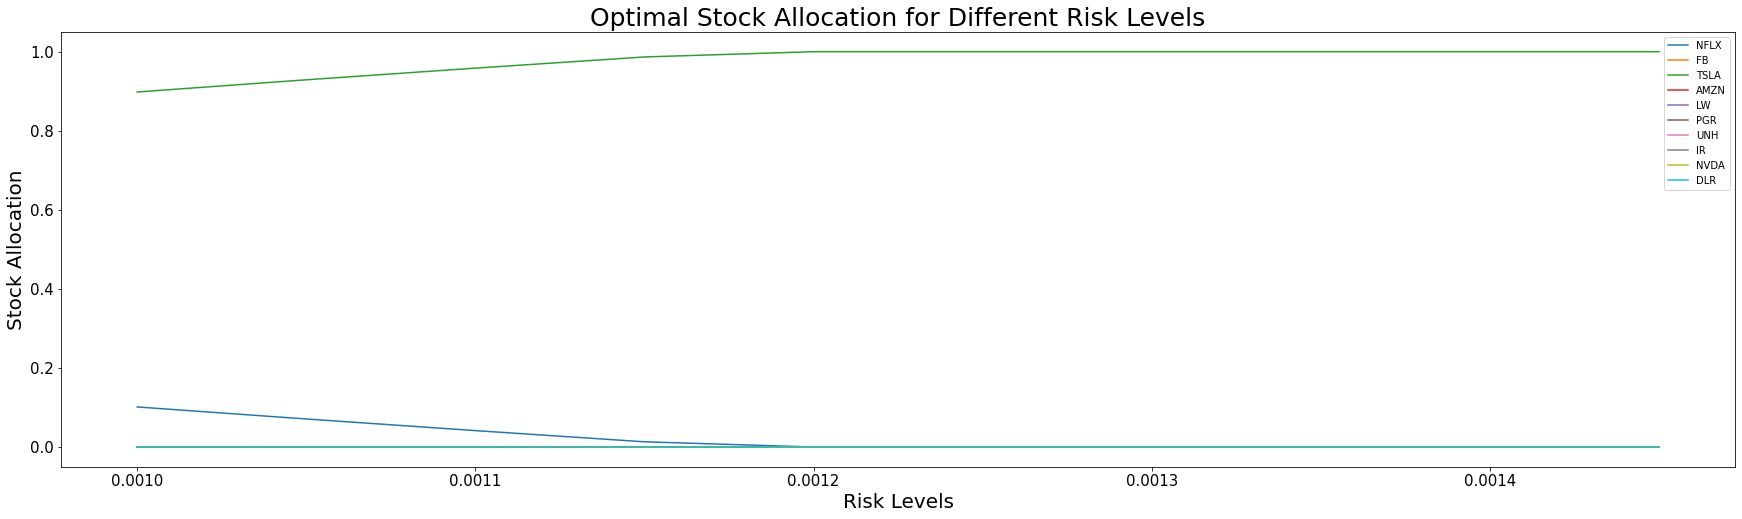

In [ ]:
# generating the dataframe for proportions of the portfolio for each risk limit
param_analysis = pd.DataFrame.from_dict(param_analysis, orient='index')
param_analysis.columns = [ 'NFLX', 'FB', 'TSLA', 'AMZN', 'LW', 'PGR', 'UNH', 'IR', 'NVDA', 'DLR']
param_analysis.plot()
plt.title('Optimal Stock Allocation for Different Risk Levels',fontsize=25)
plt.xlabel('Risk Levels',fontsize=20)
plt.ylabel('Stock Allocation',fontsize=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.show()

**Conclusion:** This shows that TSLA (Tesla) has high risk and low diversity, this means we would benefit most from putting our money into TSLA (Tesla). The other stocks we chose from see to have zero risk and low diversity. TSLA is the only stock that stands out. 

In [ ]:
# subset
risk = list(returns.keys()) # make keys a list defining risk
print(risk)
reward = list(returns.values()) # make values to a list showing reward
print(reward) 

[0.001, 0.00105, 0.0010999999999999998, 0.0011499999999999998, 0.0011999999999999997, 0.0012499999999999996, 0.0012999999999999995, 0.0013499999999999994, 0.0013999999999999993, 0.0014499999999999992]
[0.0015943829779054904, 0.0015984846497754798, 0.0016023977988131755, 0.0016061506416099828, 0.0016079254410463876, 0.0016079255849773034, 0.0016079256090662376, 0.0016079279483057407, 0.0016079262975142422, 0.0016079258133074885]


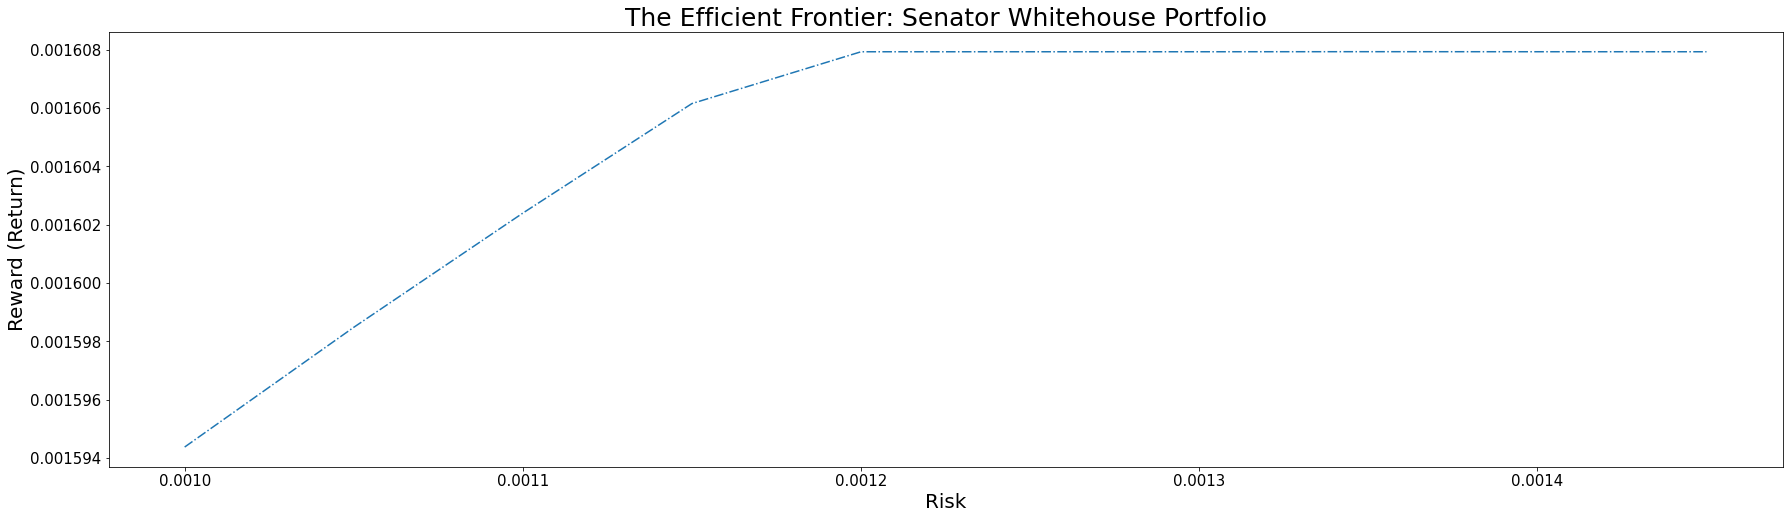

In [ ]:
# plot! pylab makes it easy
from pylab import *
plot(risk, reward, '-.')
title('The Efficient Frontier: Senator Whitehouse Portfolio',fontsize=25)
xlabel('Risk',fontsize=20)
ylabel('Reward (Return)',fontsize=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.show()

**Conclusion:** Based on the efficient frontier at return 0.001608 (0.16%) the risk level is 0.0012. This means that we will not yield a higher return with higher risk at this point. The allocation plot also shows this at risk point 0.0012. 

#Analysis

We have chosen to use the risk rate 0.0012 and dump all money into TSLA (Tesla) based on the allocation and efficient frontier plots.

Now, we create a table that shows the price of TSLA on the first day of each month from 2021-01-01 (when we would have done our allocation) to 2021-10-01 (when we imagine we sold TSLA) to see how much we would have earned by calculating the total and average return. 



In [ ]:
# Start to pull data from yahoo financials
!pip install yahoo_fin
!pip install requests_html
import yahoo_fin.stock_info as si
ticker_TSLA = ['TSLA']
# pull monthly price data of TSLA from Jan to Oct 2021 to see how much we would have earned 
dow_pricesTSLA = {ticker : si.get_data(ticker,start_date = '01/01/2021',end_date='10/31/2021',interval='1mo') for ticker in ticker_TSLA}

In [ ]:
# Show the stock price from 2021-01-01 to 2021-10-01
dow_pricesTSLA

{'TSLA':                   open         high         low  ...     adjclose     volume  ticker
 2021-01-01  719.460022   900.400024  717.190002  ...   793.530029  705694800    TSLA
 2021-02-01  814.289978   880.500000  619.000000  ...   675.500000  522857900    TSLA
 2021-03-01  690.109985   721.109985  539.489990  ...   667.929993  942452400    TSLA
 2021-04-01  688.369995   780.789978  659.419983  ...   709.440002  678539700    TSLA
 2021-05-01  703.799988   706.000000  546.979980  ...   625.219971  625175800    TSLA
 2021-06-01  627.799988   697.619995  571.219971  ...   679.700012  519921900    TSLA
 2021-07-01  683.919983   700.000000  620.460022  ...   687.200012  448393900    TSLA
 2021-08-01  700.000000   740.390015  648.840027  ...   735.719971  381113700    TSLA
 2021-09-01  734.080017   799.000000  708.849976  ...   775.479980  390101400    TSLA
 2021-10-01  778.400024  1115.209961  763.590027  ...  1114.000000  528800500    TSLA
 
 [10 rows x 7 columns]}

In [ ]:
# Get the adjclose price
prep_dataTSLA = pd.DataFrame(dow_pricesTSLA['TSLA']['adjclose']).rename(columns = {"adjclose":"TSLA"})
prep_dataTSLA

,TSLA
2021-01-01,793.530029
2021-02-01,675.500000
2021-03-01,667.929993
2021-04-01,709.440002
2021-05-01,625.219971
2021-06-01,679.700012
2021-07-01,687.200012
2021-08-01,735.719971
2021-09-01,775.479980
2021-10-01,1114.000000


In [ ]:
# create return features 
# we will just use a pct_change as the return
return_dataTSLA = prep_dataTSLA.pct_change()
# drop the na records
return_dataTSLA.dropna(inplace=True)
return_dataTSLA

,TSLA
2021-02-01,-0.148740
2021-03-01,-0.011207
2021-04-01,0.062147
2021-05-01,-0.118713
2021-06-01,0.087137
2021-07-01,0.011034
2021-08-01,0.070605
2021-09-01,0.054042
2021-10-01,0.436530


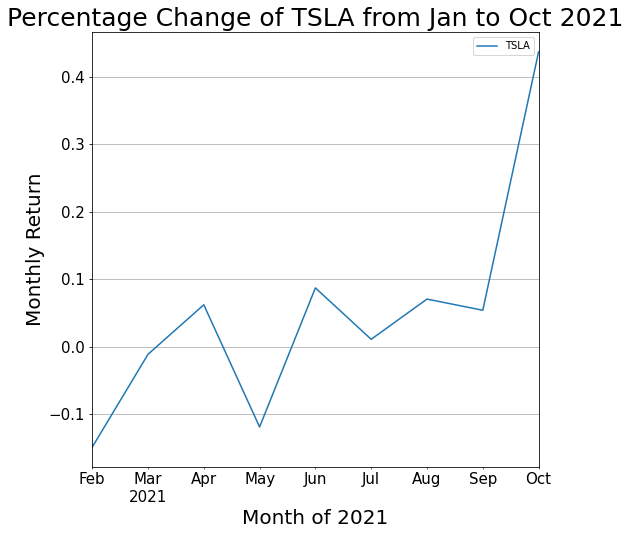

In [ ]:
# Visualize the Time Series
return_dataTSLA.plot(subplots=True,
        grid=True, 
        layout=(1,1),
        figsize=(8,8),
        fontsize=15)
plt.title('Percentage Change of TSLA from Jan to Oct 2021',fontsize=25)
plt.xlabel('Month of 2021',fontsize=20)
plt.ylabel('Monthly Return',fontsize=20)
plt.show()

In [ ]:
# total and average return of TSLA for the 10 months
print('Total Return of',return_dataTSLA.sum())
print('Average Return of', np.mean(return_dataTSLA))

Total Return of TSLA    0.442836
dtype: float64
Average Return of TSLA    0.049204
dtype: float64


##What If
What if the investor picked the other risk level? If he picked the risk rate of 0.001, the stock allocation would become 9 (Tesla) and 1 (Netflix). What would the total return and average return be?

In [ ]:
# Start to pull data from yahoo financials
!pip install yahoo_fin
!pip install requests_html
import yahoo_fin.stock_info as si
ticker_TSLANFLX = ['TSLA','NFLX']
# pull monthly price data of TSLA from Jan to Oct 2021 to see how much we would have earned 
dow_pricesTSLANFLX = {ticker : si.get_data(ticker,start_date = '01/01/2021',end_date='10/31/2021',interval='1mo') for ticker in ticker_TSLANFLX}

In [ ]:
# Show the two stock price from 2021-01-01 to 2021-10-01
dow_pricesTSLANFLX

{'NFLX':                   open        high         low  ...    adjclose     volume  ticker
 2021-01-01  539.000000  593.289978  485.670013  ...  532.390015  139988600    NFLX
 2021-02-01  536.789978  566.650024  518.280029  ...  538.849976   61902300    NFLX
 2021-03-01  545.570007  556.989990  492.850006  ...  521.659973   90183900    NFLX
 2021-04-01  529.929993  563.559998  499.000000  ...  513.469971  111573300    NFLX
 2021-05-01  512.650024  518.950012  478.540009  ...  502.809998   66927600    NFLX
 2021-06-01  504.010010  536.130005  482.140015  ...  528.210022   78560600    NFLX
 2021-07-01  525.719971  557.539978  504.660004  ...  517.570007   77219000    NFLX
 2021-08-01  519.000000  569.479980  505.369995  ...  569.190002   54742300    NFLX
 2021-09-01  569.000000  619.000000  568.080017  ...  610.340027   82314700    NFLX
 2021-10-01  604.239990  690.969971  594.679993  ...  690.309998   98565000    NFLX
 
 [10 rows x 7 columns],
 'TSLA':                   open         hi

In [ ]:
# Get the adjclose price
prep_dataTSLANFLX = pd.DataFrame(dow_pricesTSLANFLX['TSLA']['adjclose']).rename(columns = {"adjclose":"TSLA"})

# combine all the tickers (all the rest of the samples)
for i in ticker_TSLANFLX[1:]:
  prep_dataTSLANFLX[i] = pd.DataFrame(dow_pricesTSLANFLX[i]['adjclose'])
prep_dataTSLANFLX

,TSLA,NFLX
2021-01-01,793.530029,532.390015
2021-02-01,675.500000,538.849976
2021-03-01,667.929993,521.659973
2021-04-01,709.440002,513.469971
2021-05-01,625.219971,502.809998
2021-06-01,679.700012,528.210022
2021-07-01,687.200012,517.570007
2021-08-01,735.719971,569.190002
2021-09-01,775.479980,610.340027
2021-10-01,1114.000000,690.309998


In [ ]:
# create return features 

# we will just use a pct_change as the return
return_dataTSLANFLX = prep_dataTSLANFLX.pct_change()

# drop the na records
return_dataTSLANFLX.dropna(inplace=True)
return_dataTSLANFLX

,TSLA,NFLX
2021-02-01,-0.148740,0.012134
2021-03-01,-0.011207,-0.031901
2021-04-01,0.062147,-0.015700
2021-05-01,-0.118713,-0.020761
2021-06-01,0.087137,0.050516
2021-07-01,0.011034,-0.020144
2021-08-01,0.070605,0.099735
2021-09-01,0.054042,0.072296
2021-10-01,0.436530,0.131025


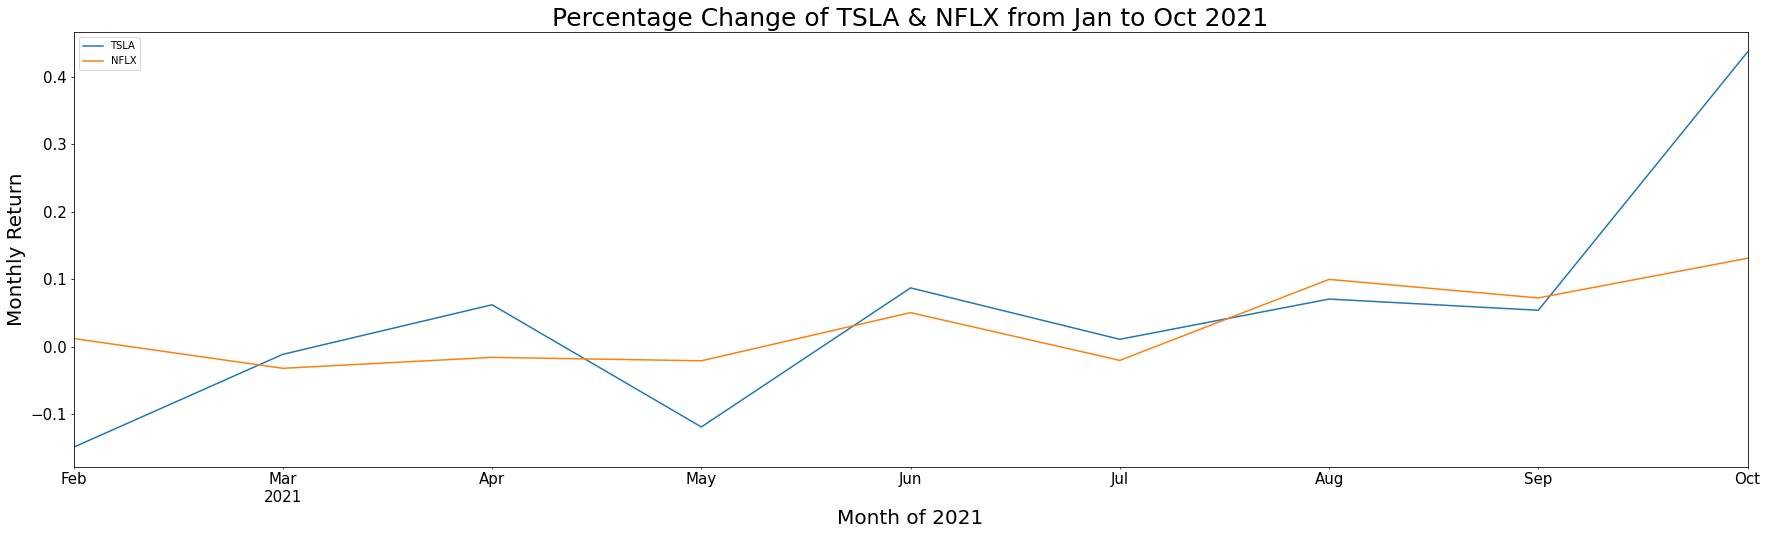

In [ ]:
# Visualize the Time Series
return_dataTSLANFLX.plot(fontsize=15)
plt.title('Percentage Change of TSLA & NFLX from Jan to Oct 2021',fontsize=25)
plt.xlabel('Month of 2021',fontsize=20)
plt.ylabel('Monthly Return',fontsize=20)
plt.show()

##What If Results
Compared with the results of the previous analysis, the total return of two stocks is 1.7% lower, and the average return of two stocks is only 0.2% which is very small. Therefore, the investor may choose the most optimal stock allocation with a higher return. 

In [ ]:
# total and average return of TSLA & NFLX for the 10 months
return_dataT = (return_dataTSLANFLX['TSLA'].sum())*0.9
return_dataN = (return_dataTSLANFLX['NFLX'].sum())*0.1
print('Total Return of TSLA',return_dataT)
print('Total Return of NFLX',return_dataN) 
print('Average Return of TSLA', np.mean(return_dataTSLANFLX['TSLA'])*0.9)
print('Average Return of NFLX', np.mean(return_dataTSLANFLX['NFLX'])*0.1)
print('Total Return of Two Stocks',return_dataT + return_dataN)
print('Average Return of Two Stocks', np.mean(return_dataTSLANFLX['TSLA'])*0.9 + np.mean(return_dataTSLANFLX['NFLX'])*0.1)
print('Difference of Total Return',return_dataTSLA.sum()-(return_dataT + return_dataN))
print('Difference of Average Return',np.mean(return_dataTSLA)-(np.mean(return_dataTSLANFLX['TSLA'])*0.9 + np.mean(return_dataTSLANFLX['NFLX'])*0.1))

Total Return of TSLA 0.39855222996662965
Total Return of NFLX 0.027720101494593974
Average Return of TSLA 0.04428358110740329
Average Return of NFLX 0.003080011277177108
Total Return of Two Stocks 0.4262723314612236
Average Return of Two Stocks 0.0473635923845804
Difference of Total Return TSLA    0.016563
dtype: float64
Difference of Average Return TSLA    0.00184
dtype: float64


#Conclusion


*   Senator Whitehouse heavily invested in Healthcare and Information Technology sectors built out from S&P 500. 
*   He had a very diverse portfolio that spread out in all kinds of sectors, which shows that he is trying to reduce risk by holding low return stocks in Utilities and Materials sectors.

*   Based on the optimal stock allocation and the efficient frontier, we would like to aggressively invest all money into Tesla at the risk rate of 0.0012 (the return rate of 0.16%).

* Although choosing stocks from different sectors for our original portfolio, we selected the stocks that are positively correlated with relatively high return and many come with high risk.The diversity of our original portfolio is low, but when the market is strong, we have higher chances to receive reward soon.

* Many of S&P 500 companies pay dividends each quarter. We noticed the Senator had a tendency to trade stocks in certain months. We suspect it may be relevant to the dividend events as the price will be adjusted after the divided date. For example, AAPL normally pays a dividend in May and after the dividend date, the price will be adjusted and there may be a good time to purchase the stock. Getting to know the dividend timing may provide us a reference when to buy or sell the stocks. 

* It appears that the senator tried to time the market in two ways. First was to minimize purchase pricing by taking advantage of ex dividend date price declines. Second was to minimize taxes paid by holding for longer than 1 year. Despite using these two methods to time the market, the optimal strategy over the time frame analized would've been to simply buy and hold TSLA. Further, if the senator had continued to hold or even buy more TSLA over the months following the initial data, he would've gained an additional 40% portfolio growth.

* Historical performance is not always an indication of future performance for a stock. Reconsider the TSLA percent change, but exclude the 10-1-2021 data point. In doing this we see a relatively flat stock price, with values ranging from down 14% to up 8%. This flux around the 0% mark would've meant TSLA had been a poor choice, if not for the extreme growth seen on the last month of the data set.